## Final Project Submission

* Student name: Vincent Welsh
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL: https://medium.com/@jvincentwelsh99/gauss-markov-assumptions-effect-on-your-ordinary-least-squares-regression-model-and-why-it-matters-471a3b0f68


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Business Problem:
The real estate market is facing a big problem, price gouging. Large companies are buying homes in bulk to rent/sell them at profitable margins. Home seeking individuals and families are competing against enterprise analytics and tactics. To mitigate this social/economic pitfall, Google is developing an open source real estate analysis project. The end product will provide users with information regarding real estate market trends at any geographical scale. I have been assigned to provide insights into the real estate market in King's County WA. User's will need to know which aspects of homes in Kings County will impact sale price the most. Users will also need to how areas within the county affect price. This predictive model and analysis will provide insights into the impact of house features on sale price.  

This product will empower small real estate seekers with industry grade analytics an no cost.

In [598]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (
    OneHotEncoder, PolynomialFeatures, StandardScaler)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
from sklearn.model_selection import (
    cross_val_score, KFold, train_test_split,
    cross_validate, ShuffleSplit)
import scipy.stats as stats
from itertools import combinations
import statsmodels.api as sm
from statsmodels.regression import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import scipy.stats
import random

# Business Understanding

For the sake of this project I will act as an advisor to Google engineers developing the real estate product for Kings County. I will be assessing house details that impact house price and will provide insights into how much the features will affect price. Moreover, I will develop a categorical understanding of how location influences house attributes and their relationship to house price.

# Obtain

In [599]:
og_df = pd.read_csv('data/kc_house_data.csv')

# Functions

## mean_confidence_interval
source(https://stackoverflow.com/a/15034143/12305091)

In [600]:
def mean_confidence_interval(data, confidence=0.95):
    """
    IN: List or series, must be numerical.
    OUT: Mean, Lower Mean Confidence Interval, Higher Mean Confidence Interval
    """
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

## format_num

In [601]:
def format_num(data_value,indx):
    """
    This function formats graphs by adding B to billions, M to milliions, 
    and K to thousands
    """

    if data_value >= 1_000_000_000:
        formatter = '{:1.2f}B'.format(data_value*.000000001)
        return formatter
    elif data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
        return formatter
    elif data_value >= 1_000:
        formatter = '{:1.0f}K'.format(data_value*.001)
        return formatter
    else:
        formatter=None

## rennovation_sampler

In [602]:
def rennovation_sampler():
    """
    This method is specifcally for showing a visualization at the end of the 
    notebook regarding unrenovated vs renovated homes considering sqft & geographical area
    It take a subset of random items in unrenovated_homes which is a dataframe containing
    all houses in lat_long_zone 4 and in a certain sqft living range
    OUT: list of sqft, list of price
    """
    sample = random.sample(list(unrenovated_homes.index), len(renovated_price))
    not_renovated_sqft = []
    not_renovated_price = []     
    
    not_renovated_sqft.append(unrenovated_homes.sqft_living[sample].astype(int))
    
    not_renovated_price.append(unrenovated_homes.price[sample].astype(float))
    return (not_renovated_sqft, not_renovated_price)    

## check_collin

In [603]:
def check_collin(feats, df):
    """
    IN: feats is the independent variable(s), df is the dataframe
    
    OUT: Dictionary containing feature name and variance inflaction factor
    score. If the score is > 10 it is unuseable
    
    """
    vif_dct = {}
    X_train_consts = sm.add_constant(df[feats])
    for i in range(len(X_train_consts.columns)):
    
        vif = variance_inflation_factor(X_train_consts.values, i)
        v = X_train_consts.columns[i]
        vif_dct[v] = vif
    return vif_dct
    

## model_summary

In [604]:
def model_summary(model_number):
    """
    This function can only be used for this projectt as it is.
    IN: model_number should be in the form baseline, second, third, etc.
    OUT: Summary of model results as well as previous model.
    """
    if model_number == 'baseline':
        print("Current Model")
        print("R^2 for train:", baseline_r_train)
        print("R^2 for test:", baseline_r_test)
        print("MAE for train:", baseline_mae_train)
        print("MAE for test:", baseline_mae_test)
   
    elif model_number == 'second':
        print("Current Model")
        print("R^2 for train:", second_r_train)
        print("R^2 for test:", second_r_test)
        print("MAE for train:", second_mae_train)
        print("MAE for test:", second_mae_test)
        print()
        print("Baseline Model")
        print("R^2 for train:", baseline_r_train)
        print("R^2 for test:", baseline_r_test)
        print("MAE for train:", baseline_mae_train)
        print("MAE for test:", baseline_mae_test)
        
    elif model_number == 'third':
        print("Current Model")
        print("R^2 for train:", third_r_train)
        print("R^2 for test:", third_r_test)
        print("MAE for train:", third_mae_train)
        print("MAE for test:", third_mae_test)
        print()
        print("Second Model")
        print("R^2 for train:", second_r_train)
        print("R^2 for test:", second_r_test)
        print("MAE for train:", second_mae_train)
        print("MAE for test:", second_mae_test)
    elif model_number == 'fourth':
        print("Current Model")
        print("R^2 for train:", fourth_r_train)
        print("R^2 for test:", fourth_r_test)
        print("MAE for train:", fourth_mae_train)
        print("MAE for test:", fourth_mae_test)
        print()
        print("Third Model")
        print("R^2 for train:", third_r_train)
        print("R^2 for test:", third_r_test)
        print("MAE for train:", third_mae_train)
        print("MAE for test:", third_mae_test)
    elif model_number == 'fifth':
        print("Current Model")
        print("R^2 for train:", fifth_r_train)
        print("R^2 for test:", fifth_r_test)
        print("MAE for train:", fifth_mae_train)
        print("MAE for test:", fifth_mae_test)
        print()
        print("Fourth Model")
        print("R^2 for train:", fourth_r_train)
        print("R^2 for test:", fourth_r_test)
        print("MAE for train:", fourth_mae_train)
        print("MAE for test:", fourth_mae_test)
    elif model_number == 'sixth':
        print("Current Model")
        print("R^2 for train:", sixth_r_train)
        print("R^2 for test:", sixth_r_test)
        print("MAE for train:", sixth_mae_train)
        print("MAE for test:", sixth_mae_test)
        print()
        print("Fifth Model")
        print("R^2 for train:", fifth_r_train)
        print("R^2 for test:", fifth_r_test)
        print("MAE for train:", fifth_mae_train)
        print("MAE for test:", fifth_mae_test)    

## linearity_test
source (https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0)


In [605]:

%matplotlib inline
%config InlineBackend.figure_format ='retina'

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    

# Explore

In [606]:
og_df.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  

[2 rows x 21 columns]

In [607]:
og_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Columns with NaN values are:

__waterfront__ (float64)

__view__ (float64)

__yr_renovated__ (float64)

In [608]:
og_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [609]:
og_df['waterfront'].isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

In [610]:
og_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [611]:
og_df['view'].isna().value_counts()

False    21534
True        63
Name: view, dtype: int64

In [612]:
og_df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

### Dealing with NaN columns
1. __waterfront column__: The waterfront column is a binary column where 0 means there is not a waterfront attached to the house and 1 means that there is. Based on this, we can assume NaN values represent 0.

2. __view column__: This column represents the amount of times a house has been viewed. This column needs to be inspected later to see if it is useful. In the meantime, the column only has 63 NaN values and we can assume NaN means 0 i.e. not viewed.

3. __yr_renovated column__: I will change this column to a binary column because there are too many missing values, 21% of all the values. I will change it to either 1.0 where the house has been renovated and 0 where the house has not been renovated. It may also help the model to add a time distance between the last renovation. Houses that have not been renovated would just have the time since they were built.

## Columns with non-integer data types
__date__ (object) when the house was sold

__sqft_basement__ (object)

In [613]:
og_df['date'].head(2)

0    10/13/2014
1     12/9/2014
Name: date, dtype: object

In [614]:
og_df['sqft_basement'].head(2)

0      0.0
1    400.0
Name: sqft_basement, dtype: object

### Dealing with non-integer columns
1. __date column__: In this column I will convert to a number that represents how long before the house was purchased.

2. __sqft_basement column__: This column seems to be an object for no reason. I will simply convert all the data to a numeric type.

# Scrub

## Clean NaN values:

### Waterfront Column:

In [615]:
og_df['waterfront'].isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

In [616]:
og_df['waterfront'].fillna(0.0,inplace=True)

In [617]:
og_df['waterfront'].isna().value_counts()

False    21597
Name: waterfront, dtype: int64

### View Column:

In [618]:
og_df['view'].isna().value_counts()

False    21534
True        63
Name: view, dtype: int64

In [619]:
og_df['view'].fillna(0.0,inplace=True)

In [620]:
og_df['view'].isna().value_counts()

False    21597
Name: view, dtype: int64

### yr_renovated Column:

In [621]:

og_df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [622]:
og_df.index

RangeIndex(start=0, stop=21597, step=1)

In [623]:
vals = []
for i in range(len(og_df)):
    if np.isnan(og_df['yr_renovated'].iloc[i]):
        vals.append(0)
    elif og_df['yr_renovated'].iloc[i] == 0:
        vals.append(0)
    elif og_df['yr_renovated'].iloc[i] > 0:
        vals.append(1)
        

In [624]:
og_df['is_renovated'] = vals

In [625]:
og_df['is_renovated'].isna().value_counts()

False    21597
Name: is_renovated, dtype: int64

In [626]:
og_df.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...        1180            0.0   
1      7242     2.0         0.0   0.0  ...        2170          400.0   

   yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          0.0    98178  47.5112 -122.257           1340   
1      1951       1991.0    98125  47.7210 -122.319           1690   

   sqft_lot15  is_renovated  
0        5650             0  
1        7639             1  

[2 rows x 22 columns]

## Clean non-integer types

### Date Column

In [627]:
og_df['date'] = og_df['date'].astype(object)

In [628]:
og_df['date'].isna().value_counts()

False    21597
Name: date, dtype: int64

### sqft_basement column

This column has a ? as a value. This column is not necessary because it will cause collinearity with other independent values anyways. Additionally, the sqft_above column represents how much square feet is not included in the basement. Also, there is a square footage of the house and property. This column will not assist in our model.

In [629]:
og_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2720.0        1
4820.0        1
704.0         1
243.0         1
1245.0        1
Name: sqft_basement, Length: 304, dtype: int64

# Train Test Split

In [630]:
y = og_df['price']
X = og_df.drop(columns = 'price')

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16197, 21), (5400, 21), (16197,), (5400,))

# Correlation Inspection

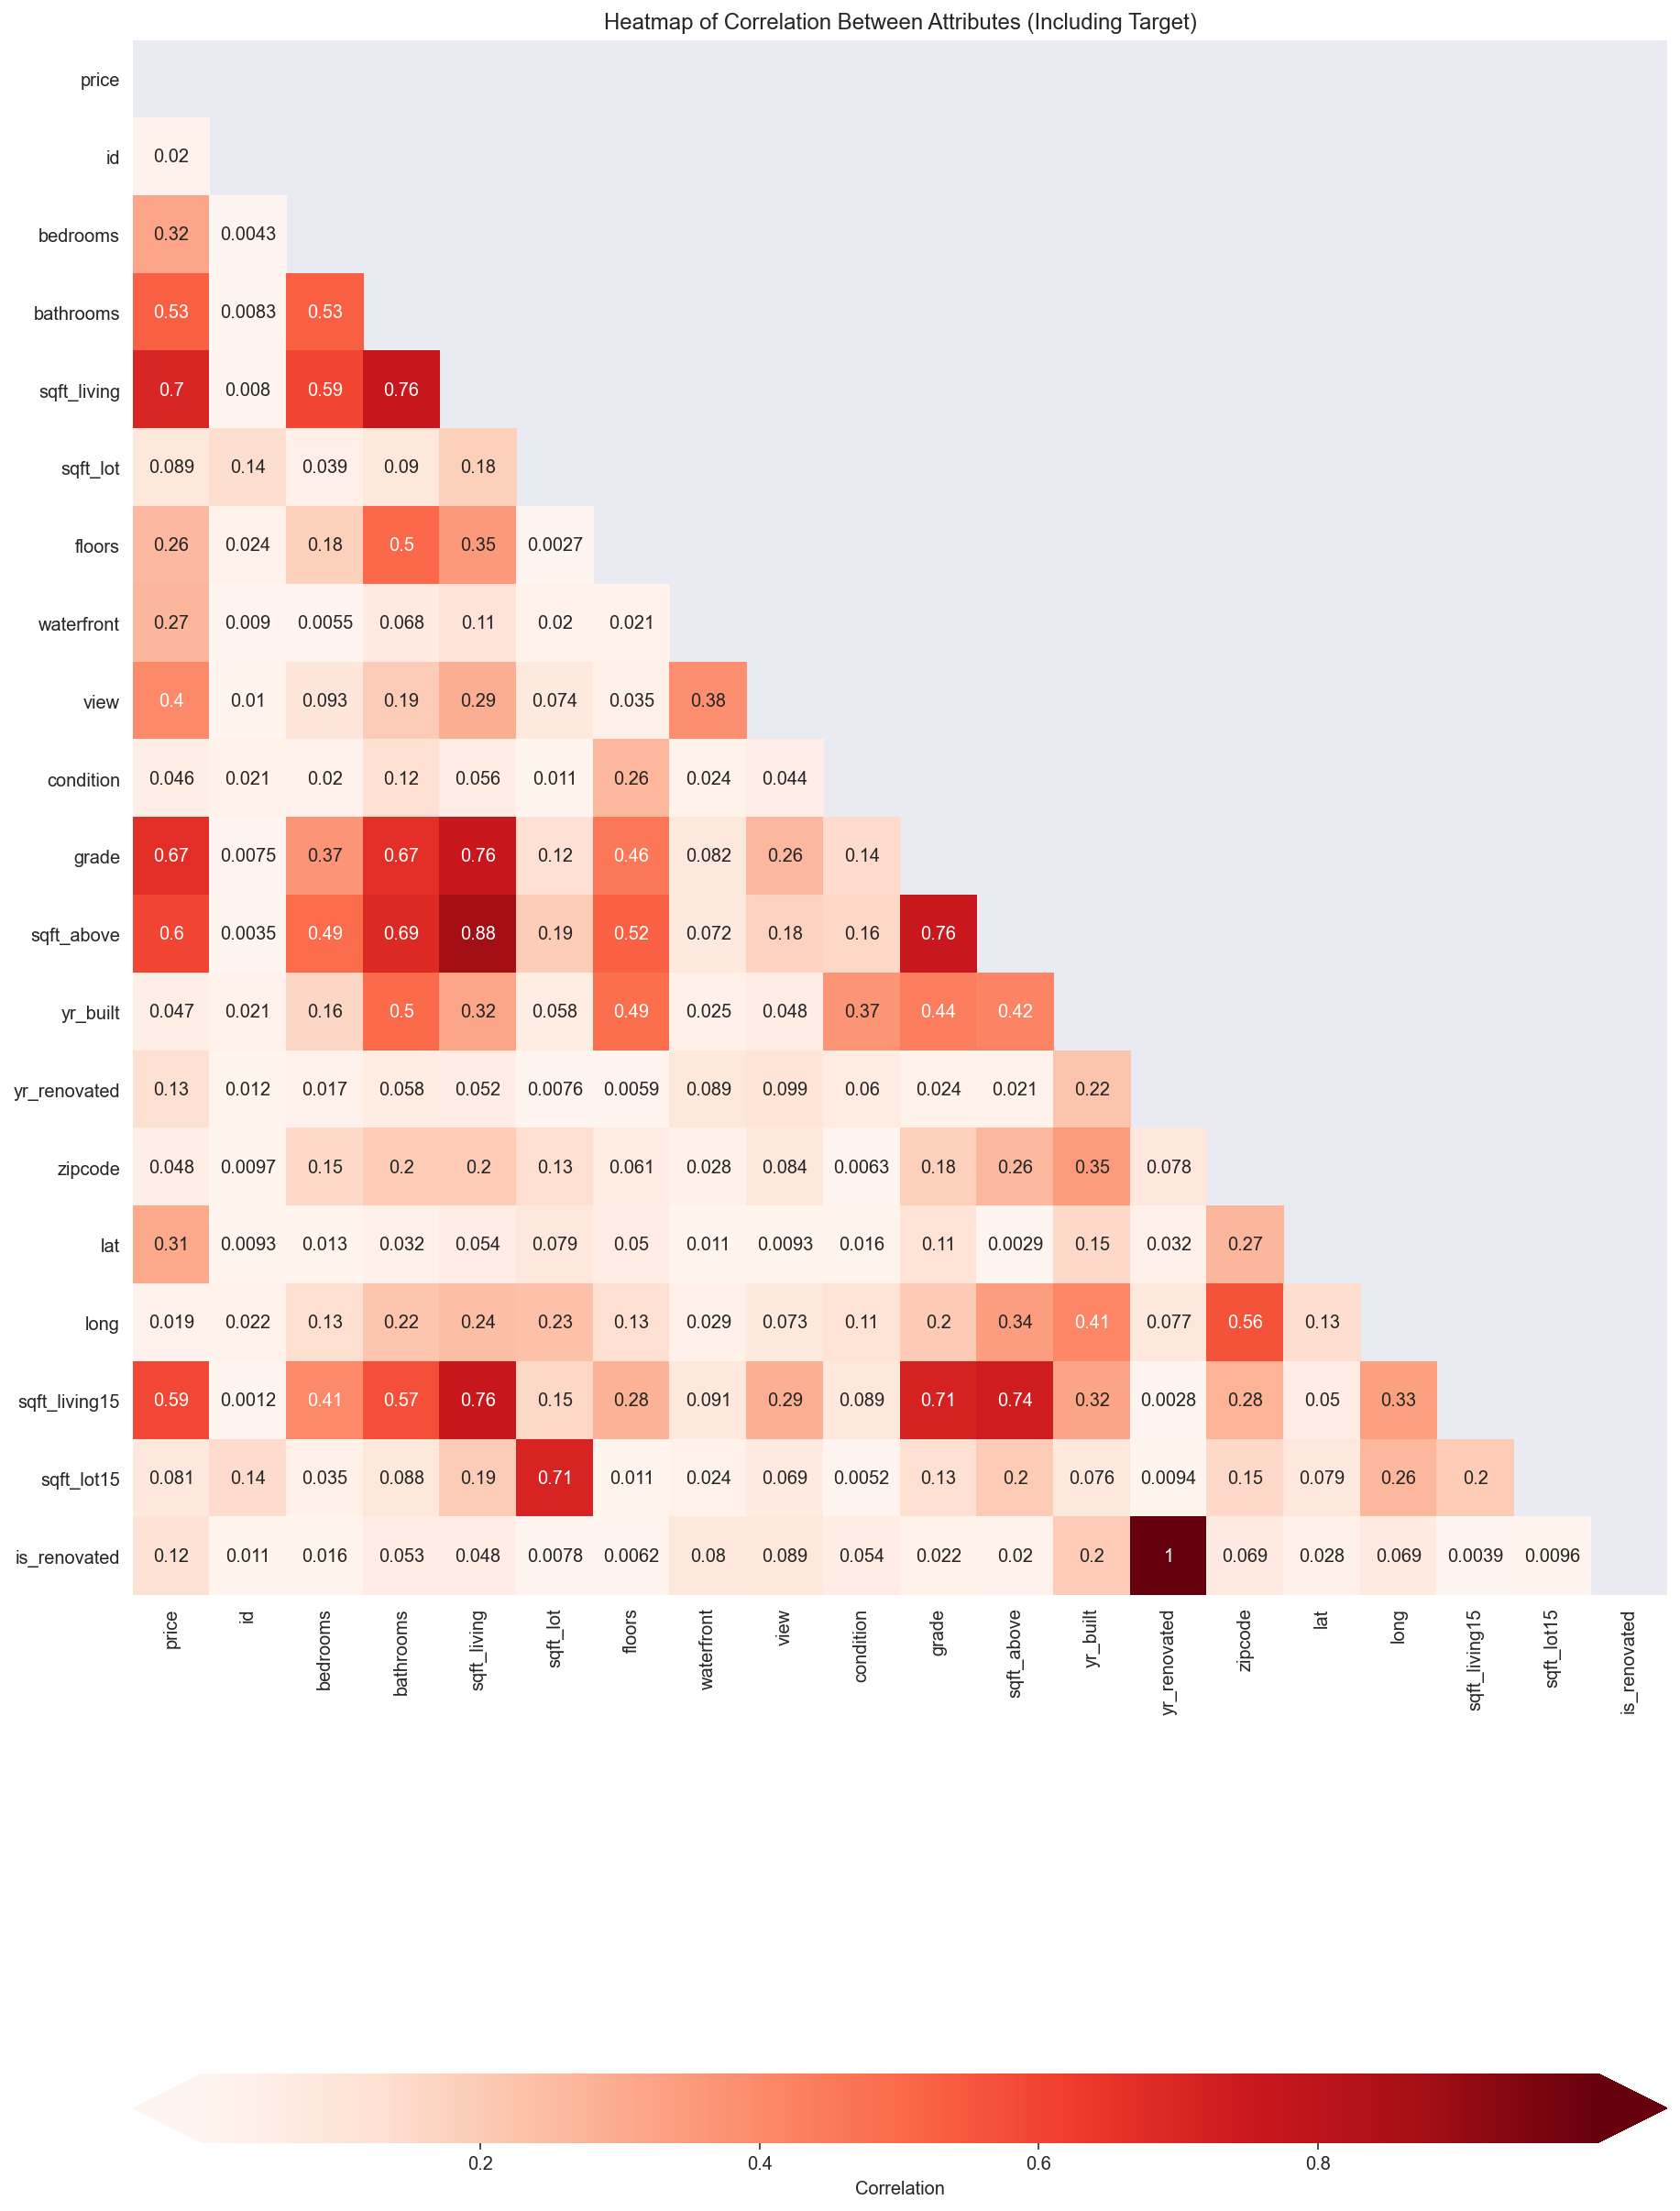

In [631]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr().abs()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 24))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    cmap='Reds',
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [632]:
#builds a correlation of the dataset
cor = og_df.corr()
#assigns cor_target to correlation of vairables to price variable
cor_target = abs(corr['price'])
#assigned feattures that have a |correlation| > .5
relevant_features = cor_target[cor_target>.5]
relevant_features

price            1.000000
bathrooms        0.529906
sqft_living      0.700397
grade            0.671702
sqft_above       0.601355
sqft_living15    0.591150
Name: price, dtype: float64

In [633]:
most_correlated_feature = 'sqft_living'

# Modeling

## Baseline Model

The baseline model contains only the most correlated feature as the independent variable. ('sqft_living')

In [634]:
baseline_model = LinearRegression()
baseline_model.fit(X_train[[most_correlated_feature]], y_train)
y_pred_train = baseline_model.predict(X_train[[most_correlated_feature]])
y_pred_test = baseline_model.predict(X_test[[most_correlated_feature]])

#R^2
baseline_r_train = baseline_model.score(X_train[[most_correlated_feature]], y_train)
baseline_r_test = baseline_model.score(X_test[[most_correlated_feature]], y_test)
#MAE
baseline_mae_train = mean_absolute_error(y_train, y_pred_train)
baseline_mae_test = mean_absolute_error(y_test, y_pred_test)

In [635]:
model_summary('baseline')

Current Model
R^2 for train: 0.49055555791820316
R^2 for test: 0.4988509662233589
MAE for train: 174170.69292786266
MAE for test: 171964.8279881515


### Analysis of Baseline Model

The Baseline Model R^2 and MAE are too low and high respectively. I will add x variables in the following models.

## Second Model

This model contains the relevant features based on correlation to price. i.e. features with a correlation to price > .5.

In [636]:
relevant_feats = ['bathrooms','sqft_living','grade','sqft_above',
                 'sqft_living15']

In [637]:
second_model = LinearRegression()
second_model.fit(X_train[relevant_feats], y_train)
y_pred_train = second_model.predict(X_train[relevant_feats])
y_pred_test = second_model.predict(X_test[relevant_feats])

# R^2
second_r_train = second_model.score(X_train[relevant_feats],y_train)
second_r_test = second_model.score(X_test[relevant_feats],y_test)
#MAE
second_mae_train = mean_absolute_error(y_train,y_pred_train)
second_mae_test = mean_absolute_error(y_test,y_pred_test)


In [638]:
model_summary('second')

Current Model
R^2 for train: 0.5472505683469051
R^2 for test: 0.5353327901008353
MAE for train: 161684.0563390371
MAE for test: 160329.12194395793

Baseline Model
R^2 for train: 0.49055555791820316
R^2 for test: 0.4988509662233589
MAE for train: 174170.69292786266
MAE for test: 171964.8279881515


### Analysis of Second Model
The second model did not do much better the baseline model. This is likely because domain knowledge is needed to build a better model.


## Third model
This model I am training with data that have a correlation > .2

In [639]:
cor = og_df.corr()
cor_target = abs(corr['price'])
relevant_features = cor_target[cor_target>.2]
relevant_features

price            1.000000
bedrooms         0.320253
bathrooms        0.529906
sqft_living      0.700397
floors           0.257826
waterfront       0.267665
view             0.400362
grade            0.671702
sqft_above       0.601355
lat              0.306659
sqft_living15    0.591150
Name: price, dtype: float64

In [640]:
third_model_feats = ['sqft_living','waterfront','view','grade',
                    'sqft_above','sqft_living15','bathrooms','bedrooms',
                    'lat','long']

In [641]:
third_model = LinearRegression()
third_model.fit(X_train[third_model_feats], y_train)
y_pred_train = third_model.predict(X_train[third_model_feats])
y_pred_test = third_model.predict(X_test[third_model_feats])

# R^2
third_r_train = third_model.score(X_train[third_model_feats],y_train)
third_r_test = third_model.score(X_test[third_model_feats],y_test)
#MAE
third_mae_train = mean_absolute_error(y_train,y_pred_train)
third_mae_test = mean_absolute_error(y_test,y_pred_test)


In [642]:
model_summary('third')

Current Model
R^2 for train: 0.666706338052635
R^2 for test: 0.6587302361601102
MAE for train: 134472.12810477352
MAE for test: 133284.66167780122

Second Model
R^2 for train: 0.5472505683469051
R^2 for test: 0.5353327901008353
MAE for train: 161684.0563390371
MAE for test: 160329.12194395793


In [643]:
check_collin(third_model_feats, X_train)

{'const': 978585.0928813964,
 'sqft_living': 7.369360383647107,
 'waterfront': 1.1771661462576606,
 'view': 1.3773199324683838,
 'grade': 3.147620157204455,
 'sqft_above': 5.390731167020757,
 'sqft_living15': 2.9230798006228857,
 'bathrooms': 2.5940545403515185,
 'bedrooms': 1.6723423244767424,
 'lat': 1.0599020551280913,
 'long': 1.264781564478438}

### Analysis of third model
This model has a significantly better R^2 and MAE compared to previous models. However, with a MAE of $133,284 this model is still useless and needs further preprocessing. For the next models I will add features to the data set and remove outliers to produce a normal distribution.

# Removing Outliers

## Investigate Distribution
There is a strong right skew.

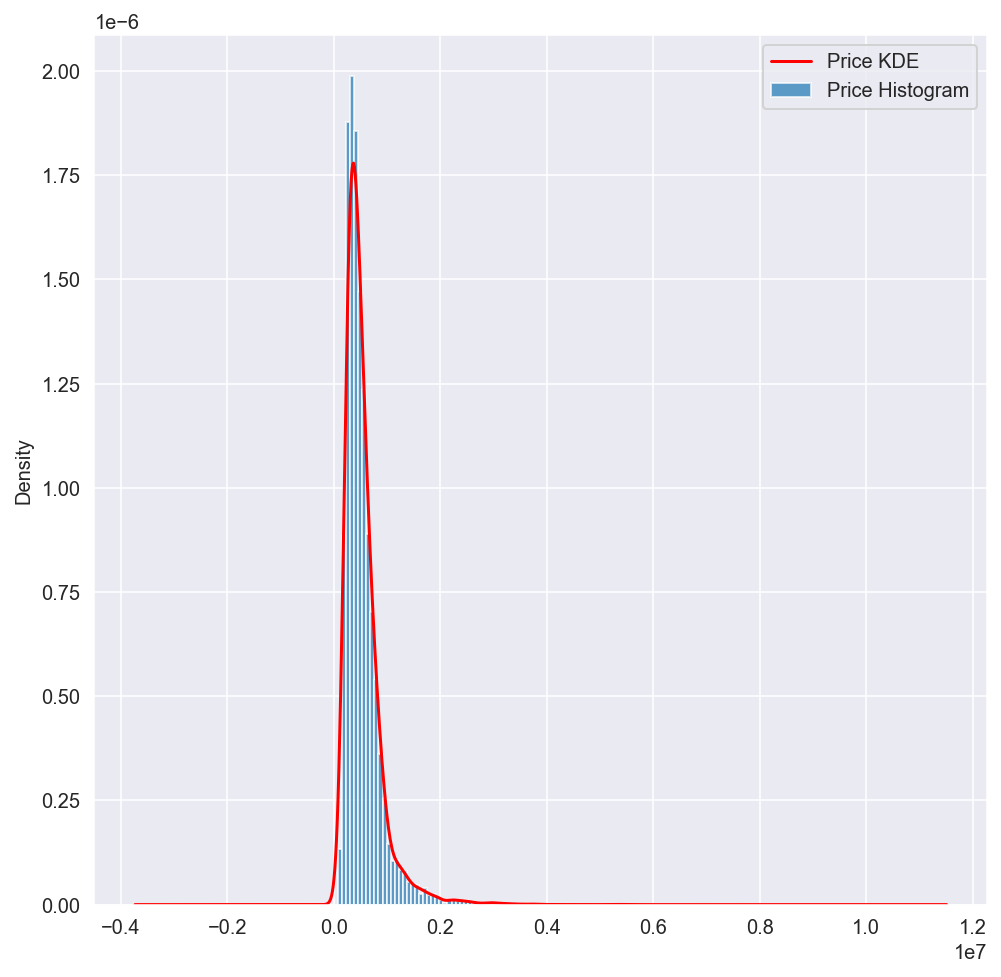

In [644]:
#Display historgram of house price distribution

binsize=100
og_df.price.plot.hist(bins=binsize,density=True,alpha=.7,label = 'Price Histogram',
                     figsize=(8,8))
og_df.price.plot.kde(bw_method=.25,label='Price KDE',color='red')
plt.legend()
plt.show()

### Low range cutoff

In [645]:
og_df.price.quantile(.05)

210000.0

### High range cutoff

In [646]:
og_df.price.quantile(.95)

1160000.0

## Remove top .05% of home prices from data
Based on the high outliers causing a right skew I will remove the top 5% of the data. i.e. House price > $1,160,000 will be removed.

### Before

In [647]:
og_df.shape

(21597, 22)

In [648]:
#Remove indices with price > $1,160,000
index = 0
indices = []
for x in og_df.price:
    if x > 1_160_000:
        indices.append(index)
        index += 1
    else:
        index +=1   

In [649]:
len(indices)

1066

In [650]:
1066/21597

0.04935870722785572

In [651]:
for idx in indices:
    og_df.drop(index = idx, inplace=True)

### After

We removed 1066 values, just 4.9% of our data!


In [652]:
og_df.shape

(20531, 22)

## Investigate Distribution

While there is still a right skew this distribution is normal enough for our needs.

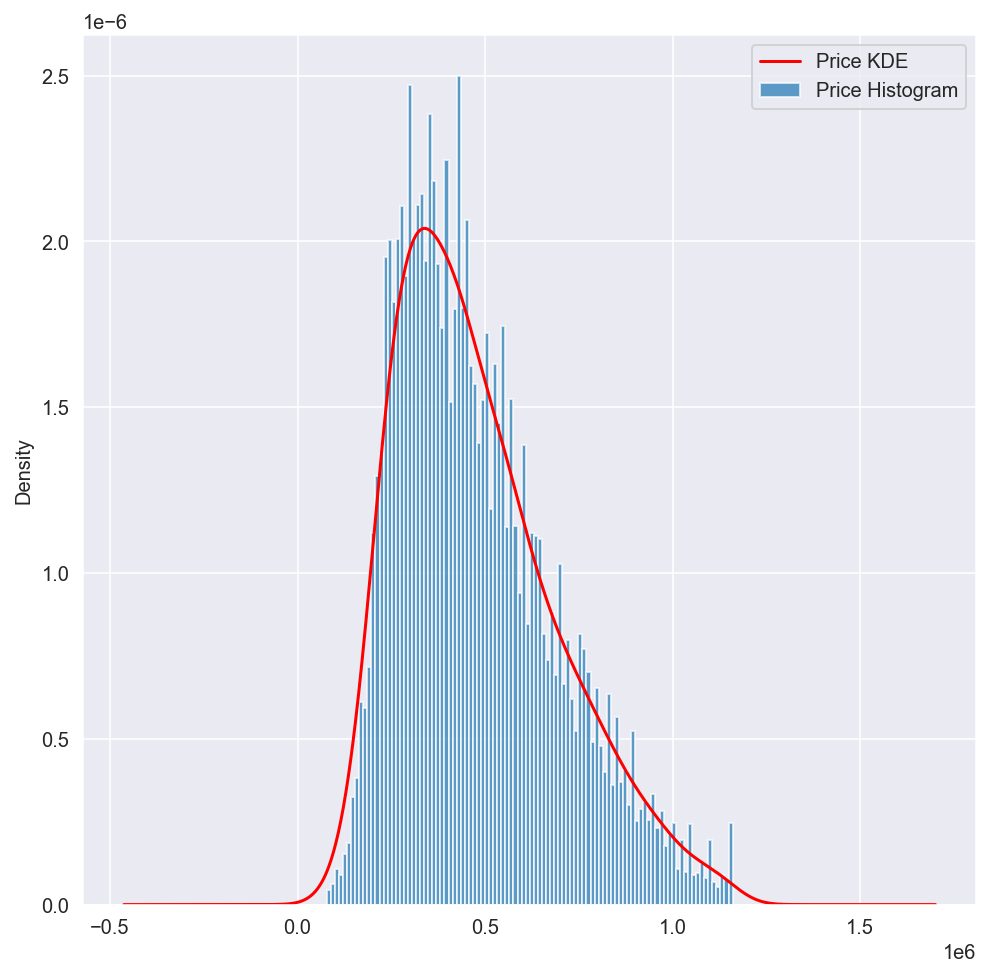

In [653]:
binsize=100
og_df.price.plot.hist(bins=binsize,density=True,alpha=.7,label = 'Price Histogram',
                     figsize=(8,8))
og_df.price.plot.kde(bw_method=.25,label='Price KDE',color='red')
plt.legend()
plt.show()

# Feature Engineering

I will now add the following independent variables:
1. Age : How old is the house in years
2. Postal Zone : Which post office area is the house in
3. Condition : Build variables so that I can Hot encode condition levels
4. Grade : Build variables so that I can Hot encode grade levels
5. Latitude Zones : Define which latitude zone homes are in
5. Latitude/Longitude Zones: Define which zone a home is in based on latitude/longitude zones.



## Age

In [654]:
#Age Column
og_df['age'] = 2021 - og_df.yr_built 

## Postal Zones

In [655]:
#Categorizing zipcode by the first postal code digit
#The digit in the [-2] index represents the local post office code. Source below
#https://www.businessinsider.com/what-do-zip-codes-mean-2015-6
og_df['str_zip'] = og_df.zipcode.astype(str)
vals = []
for x in og_df.str_zip:
    if x[-2] == '1':
        vals.append('zipcode[3] == 1')
    elif x[-2] == '0':
        vals.append('zipcode[3] == 0')
        
    elif x[-2] == '2':
        vals.append('zipcode[3] == 2')
    elif x[-2] == '3':
        vals.append('zipcode[3] == 3')
    elif x[-2] == '4':
        vals.append('zipcode[3] == 4')
    elif x[-2] == '5':
        vals.append('zipcode[3] == 5')
    elif x[-2] == '6':
        vals.append('zipcode[3] == 6')
    elif x[-2] == '7':
        vals.append('zipcode[3] == 7')
    elif x[-2] == '8':
        vals.append('zipcode[3] == 8')
    elif x[-2] == '9':
        vals.append('zipcode[3] == 9')
og_df['postal_zone_code'] = vals
og_df = og_df.drop(columns = ['str_zip'])

## Condition


In [656]:
og_df.condition.value_counts()

3    13331
4     5437
5     1567
2      168
1       28
Name: condition, dtype: int64

In [657]:
vals = []
for x in og_df.condition:
    if x == 1:
        vals.append('condition == 1')
    elif x == 2:
        vals.append('condition == 0')
        
    elif x == 3:
        vals.append('condition == 2')
    elif x == 4:
        vals.append('condition == 3')
    elif x == 5:
        vals.append('condition == 4')
   
og_df['conditions'] = vals

## Grade

In [658]:
og_df.grade.value_counts()

7     8965
8     5957
9     2346
6     2037
10     793
5      242
11     158
4       27
12       5
3        1
Name: grade, dtype: int64

In [659]:
og_df.loc[og_df.grade==3]

id       date     price  bedrooms  bathrooms  sqft_living  \
3220  2420069251  2/25/2015  262000.0         1       0.75          520   

      sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
3220     12981     1.0         0.0   0.0  ...           0.0    98022  47.2082   

         long  sqft_living15  sqft_lot15  is_renovated  age  postal_zone_code  \
3220 -121.995           1340       12233             0  101   zipcode[3] == 2   

          conditions  
3220  condition == 4  

[1 rows x 25 columns]

In [660]:
#Since there is only one home with grade 3, I will remove it from the df.
og_df.drop(index=3220, inplace=True)
og_df.reset_index(drop=True, inplace=True)

In [661]:
og_df.loc[og_df.grade==3]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, is_renovated, age, postal_zone_code, conditions]
Index: []

[0 rows x 25 columns]

In [662]:
vals = []
for x in og_df.grade:
    if x == 4:
        vals.append('grade == 4')
        
    elif x == 5:
        vals.append('grade == 5')
    elif x == 6:
        vals.append('grade == 6')
    elif x == 7:
        vals.append('grade == 7')   
    elif x == 8:
        vals.append('grade == 7')
    elif x == 9:
        vals.append('grade == 8')
    elif x == 10:
        vals.append('grade == 9')
    elif x == 11:
        vals.append('grade == 10')
    elif x == 12:
        vals.append('grade == 11')
    elif x == 13:
        vals.append('grade == 12')
og_df['grades'] = vals

In [663]:
og_df['grades'].value_counts()

grade == 7     14922
grade == 8      2346
grade == 6      2037
grade == 9       793
grade == 5       242
grade == 10      158
grade == 4        27
grade == 11        5
Name: grades, dtype: int64

## Latitude Zones

I will break King County into 5 different zones based on latitude. Then, I will see how this affects house prices based on the latitude zone.

### Explanation
1.Get the max and min of latitude

2.Make 6 linearly spaced values between max and min

3.Look into og_df to inspect the proposed zones in order to retrieve n homes per zone. The final features will 
need to return a .value_counts() where 1 == n per corresponding zone.

4.Then, I do a for loop over og_df.lat. Depending on which zone the lat falls in a corresponding integer is added to a list. 

5.The list is then used make a new column called lat_zone that is a column of integers identifying the latitude zone of the row.

6.Then, after train, test, split, I will OneHotEncode the new columns.

In [664]:
latitude_max = og_df.lat.max()
latitude_max

47.7776

In [665]:
latitude_min = og_df.lat.min()
latitude_min

47.1559

In [666]:
#Make 6 linearly spaced values between the min and max latitude
lat_range = np.linspace(latitude_min,latitude_max,6)
lat_range

array([47.1559 , 47.28024, 47.40458, 47.52892, 47.65326, 47.7776 ])

In [763]:
#lat zone 1
len(og_df.loc[og_df['lat'] <= lat_range[1]])

506

In [668]:
#lat zone 2
len(og_df.loc[(og_df['lat'] <= lat_range[2]) & 
 (og_df['lat'] > lat_range[1])])

3351

In [669]:
#lat zone 3
len(og_df.loc[(og_df['lat'] <= lat_range[3]) & 
 (og_df['lat'] > lat_range[2])])

3973

In [670]:
# lat zone 4
len((og_df['lat'] <= lat_range[4]) & 
 (og_df['lat'] > lat_range[3]))

20530

In [671]:
#lat zone 5
len(og_df.loc[(og_df['lat'] <= lat_range[5]) & 
 (og_df['lat'] > lat_range[4])])

6616

### Construction

In [673]:
vals = []
for lat in og_df.lat:
    #lat zone 1
    #upper bound = 47.28024
    if lat <= lat_range[1]:
        vals.append('Latitude Zone 1')
    #lat zone 2
    #upper bound = 47.40458
    #lower bound = 47.28024
    elif (lat <= lat_range[2]) & (lat > lat_range[1]):
        vals.append('Latitude Zone 2')
    #lat zone 3
    #upper bound = 47.52892
    #lower bound = 47.40458
    elif (lat <= lat_range[3]) & (lat > lat_range[2]):
        vals.append('Latitude Zone 3')
    #lat zone 4
    #upper bounded = 47.65326
    #lower bound = 47.52892
    elif (lat <= lat_range[4]) & (lat > lat_range[3]):
        vals.append('Latitude Zone 4')
    #lat zone 5
    #upper bounded = 47.7776
    #lower bound = 47.65326
    elif (lat <= lat_range[-1]) & (lat > lat_range[4]):
        vals.append('Latitude Zone 5')
    
og_df['lat_zone'] = vals
og_df['lat_zone'].value_counts()        

Latitude Zone 5    6616
Latitude Zone 4    6079
Latitude Zone 3    3977
Latitude Zone 2    3351
Latitude Zone 1     507
Name: lat_zone, dtype: int64

### Latitude Zone Map

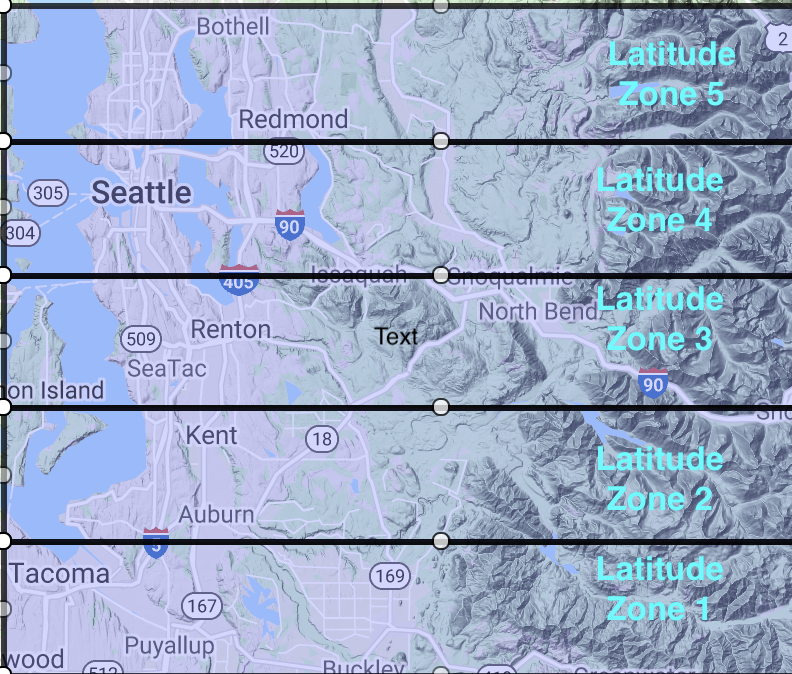

In [674]:
Image(filename='data/lat_zoned_img.png')

#### Latitude Zone Map Source


I used the website (http://apps.headwallphotonics.com/)
And then imported the below text.

#LatZone 1

47.1559,-122.51899

47.1559,-121.315

47.28024,-121.315

47.28024,-122.51899


#LatZone2

47.28025,-122.51899

47.28025,-121.315

47.4058,-121.315

47.4058,-122.51899


#LatZone3

47.4059,-122.51899

47.4059,-121.315

47.52892,-121.315

47.52892,-122.51899


#LatZone4

47.52893,-122.51899

47.52893,-121.315

47.65326,-121.315

47.65326,-122.51899

#LatZone5

47.65327,-122.51899

47.65327,-121.315

47.7776,-121.315

47.7776,-122.51899



### Thoughts On Latitude Zones
The latitude zones help the model. However, they seem to cover too broad of a range on the map. I will construct zones base on the latitude zones except split into three longitude zones in a similar way.

## Lat/Long Zones
I am adding 15 lat/long zones to mitigate the broadness of the latitude zones.



### Making Borders

In [675]:
latitude_max = og_df.lat.max()
latitude_max

47.7776

In [676]:
latitude_min = og_df.lat.min()
latitude_min

47.1559

In [677]:
#Note: I had to addd to the max long value because the linspace function below
#does not go out enough decimals. This will not affect the validity of the
#research.
longitude_max = (og_df.long.max() + 1)
longitude_max

-120.315

In [678]:
longitude_min = og_df.long.min()
longitude_min

-122.51899999999999

In [679]:
long_range = np.linspace(longitude_min, longitude_max, 4,)
long_range

array([-122.519     , -121.78433333, -121.04966667, -120.315     ])

In [680]:
lat_range = np.linspace(latitude_min,latitude_max,6)
lat_range

array([47.1559 , 47.28024, 47.40458, 47.52892, 47.65326, 47.7776 ])

In [681]:
#Longitude borders
long_one = long_range[1]
long_two = long_range[2]
long_three = long_range[3]

In [682]:
#Latitude borders
lat_one = lat_range[1]
lat_two = lat_range[2]
lat_three = lat_range[3]
lat_four = lat_range[4]
lat_five = lat_range[5]

### Defining how many houses per zone

In [683]:
zone_len = []
#zone1
zone_len.append(len(og_df.loc[(og_df.lat <= lat_one) & \
                              (og_df.long <= long_one)]))


#zone2
zone_len.append(len(og_df.loc[((og_df.lat <= lat_two) & \
                               (og_df.lat > lat_one)) & \
                               (og_df.long <= long_one)]))

#zone3
zone_len.append(len(og_df.loc[((og_df.lat <= lat_three) & \
                               (og_df.lat > lat_two)) & \
                               (og_df.long <= long_one)]))


#zone4
zone_len.append(len(og_df.loc[((og_df.lat <= lat_four) & \
                               (og_df.lat > lat_three)) & \
                               (og_df.long <= long_one)]))


#zone5
zone_len.append(len(og_df.loc[((og_df.lat <= lat_five) & \
                               (og_df.lat > lat_four)) & \
                               (og_df.long <= long_one)]))


#zone6
zone_len.append(len(og_df.loc[(og_df.lat <= lat_one) & \
              ((og_df.long > long_one) & (og_df.long <= long_two))]))


#zone7
zone_len.append(len(og_df.loc[((og_df.lat <= lat_two) & \
                               (og_df.lat > lat_one)) & \
                               ((og_df.long > long_one) & \
                                (og_df.long <= long_two))]))


#zone8
zone_len.append(len(og_df.loc[((og_df.lat <= lat_three) & (og_df.lat > lat_two)) & \
             ((og_df.long > long_one) & (og_df.long <= long_two))]))


#zone9
zone_len.append(len(og_df.loc[((og_df.lat <= lat_four) & (og_df.lat > lat_three)) & \
              ((og_df.long > long_one) & (og_df.long <= long_two))]))


#zone10
zone_len.append(len(og_df.loc[((og_df.lat <= lat_five) & (og_df.lat > lat_four)) & \
                    ((og_df.long > long_one) & (og_df.long <= long_two))])) 


#zone11
zone_len.append(len(og_df.loc[(og_df.lat <= lat_one)  & \
              (og_df.long <= long_three) & (og_df.long > long_two)]))


#zone12
zone_len.append(len(og_df.loc[((og_df.lat <= lat_two) & (og_df.lat > lat_one)) & \
              (og_df.long <= long_three) & (og_df.long > long_two)]))


#zone13
zone_len.append(len(og_df.loc[((og_df.lat <= lat_three) & (og_df.lat > lat_two)) & \
             (og_df.long <= long_three) & (og_df.long > long_two)]))


#zone14
zone_len.append(len(og_df.loc[((og_df.lat <= lat_four) & (og_df.lat > lat_three)) & \
              (og_df.long <= long_three) & (og_df.long > long_two)]))


#zone15
zone_len.append(len(og_df.loc[((og_df.lat <= lat_five) & (og_df.lat > lat_four)) & \
              (og_df.long <= long_three) & (og_df.long > long_two)]))


zone_len

[506, 3351, 3787, 6070, 6600, 1, 0, 190, 9, 16, 0, 0, 0, 0, 0]

### It appears that the empty zones are 7,11,12,13,14,15. Zone 6 only has 1 value so I will remove it from the data.

In [686]:
#zone6 index before removal (Expected = 1)
index_to_drop = og_df.loc[(og_df.lat <= lat_one) & \
              ((og_df.long > long_one) & (og_df.long <= long_two))].index


In [687]:
#zone6 shape
og_df.loc[(og_df.lat <= lat_one) & \
              ((og_df.long > long_one) & (og_df.long <= long_two))].shape

(1, 27)

In [688]:
og_df.drop(index = index_to_drop, inplace = True)

In [689]:
#zone6 shape afte removal (Expected = 0)
og_df.loc[(og_df.lat <= lat_one) & \
              ((og_df.long > long_one) & (og_df.long <= long_two))].shape

(0, 27)

In [690]:
og_df.reset_index(drop=True,inplace=True)

### Construction

I will construct the new features in the following steps.

__1. Make 8 lists of indexes of the desired zones. i.e. 1,2,3,4,5,8,9,10__

__2. Initiate an empty list vals that will be filled with numbers 1,2,3,4,5,8,9, and 10.__

__3. Loop idx from 0 to len(og_df.lat), the value of idx will be in one of the 8 lists
that I were created above. If idx is in z1_index then vals.append(1), if idx is in z2_index then
vals.append(2), etc.__

__4. Assign a new columns lat_long_zone to og_df from the vals list.__

__5. One Hot Encode the new column and then remove it from the dataset.__

In [691]:
z1_index = og_df.loc[(og_df.lat <= lat_one) & (og_df.long <= long_one)].index

z2_index = og_df.loc[((og_df.lat <= lat_two) & (og_df.lat > lat_one)) & \
                     (og_df.long <= long_one)].index

z3_index = og_df.loc[((og_df.lat <= lat_three) & \
                      (og_df.lat > lat_two)) & (og_df.long<=long_one)].index

z4_index = og_df.loc[((og_df.lat <= lat_four) & (og_df.lat > lat_three)) & 
                     (og_df.long <= long_one)].index

z5_index = og_df.loc[((og_df.lat <= lat_five) & (og_df.lat > lat_four)) & \
                     (og_df.long <= long_one)].index

z8_index = og_df.loc[((og_df.lat <= lat_three) & (og_df.lat > lat_two)) & \
             ((og_df.long > long_one) & (og_df.long <= long_two))].index

z9_index = og_df.loc[((og_df.lat <= lat_four) & (og_df.lat > lat_three)) & \
              ((og_df.long > long_one) & (og_df.long <= long_two))].index

z10_index = og_df.loc[((og_df.lat <= lat_five) & (og_df.lat > lat_four)) & \
                    ((og_df.long > long_one) & (og_df.long <= long_two))].index

In [692]:
vals = []
for idx in range(len(og_df.lat)):  
    if idx in z1_index:
        #zone1
        vals.append('Zone 2')
            
    elif idx in z2_index:
        #zone2
         vals.append('Zone 2')
            
    elif idx in z3_index:
        #zone3
        vals.append('Zone 3')
            
    elif idx in z4_index:
        #zone4
        vals.append('Zone 4')
            
    elif idx in z5_index:
        #zone5
        vals.append('Zone 5')            
    elif idx in z8_index:
        #zone8
        vals.append('Zone 8')
    elif idx in z9_index:
         #zone9
        vals.append('Zone 9') 
            
    elif idx in z10_index:
        #zone10
        vals.append('Zone 10') 



In [693]:
og_df['lat_long_zone'] = vals
og_df['lat_long_zone'].value_counts()  

Zone 5     6600
Zone 4     6070
Zone 2     3857
Zone 3     3787
Zone 8      190
Zone 10      16
Zone 9        9
Name: lat_long_zone, dtype: int64

### Zone Map

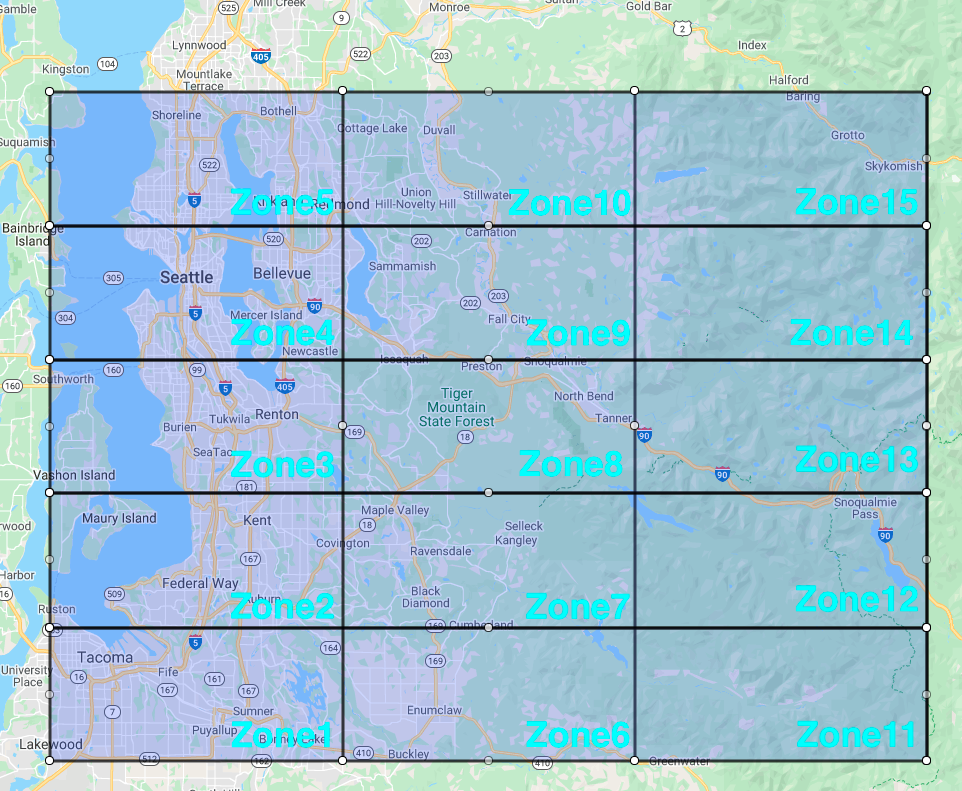

In [694]:
Image(filename='data/lat_long_zones.png')

#### Zone Map Source

I used the website (http://apps.headwallphotonics.com/)
And then imported the below text. The only difference this time is that I added the longitude barriers.

#LatZone 1

47.1559,-122.51899

47.1559,-121.315

47.28024,-121.315

47.28024,-122.51899


#LatZone2

47.28025,-122.51899

47.28025,-121.315

47.4058,-121.315

47.4058,-122.51899


#LatZone3

47.4059,-122.51899

47.4059,-121.315

47.52892,-121.315

47.52892,-122.51899


#LatZone4

47.52893,-122.51899

47.52893,-121.315

47.65326,-121.315

47.65326,-122.51899

#LatZone5

47.65327,-122.51899

47.65327,-121.315

47.7776,-121.315

47.7776,-122.51899

#LongOne
47.1559, -122.11766667

47.77776, -122.11766667

#LongTwo
47.1559, -121.71633333

47.77776, -121.71633333

#LongThree

47.1559, -121.315

47.77776, -121.315



## New Features:

In [695]:
#All of the newly created features
list(og_df.columns)[22:100]

['age',
 'postal_zone_code',
 'conditions',
 'grades',
 'lat_zone',
 'lat_long_zone']

In [696]:
#Removing the outliers took away the grade==13
og_df.loc[og_df['grade']==13]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, is_renovated, age, postal_zone_code, conditions, grades, lat_zone, lat_long_zone]
Index: []

[0 rows x 28 columns]

# 2nd Train Test Split 


# Explanation

I will be train test splitting again because I removed a substantial amount of our data, about 5%. I am doing this to keep the integrity of the notebook's storyline. This means that the new X_train, X_test, y_train, and y_test may have different values. This means that when comparing models above and below we should note that the data is slightly different. For future project I will be removing outliers earlier.

In [697]:
y = og_df['price']
X = og_df.drop(columns = 'price')

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15396, 27), (5133, 27), (15396,), (5133,))

# OHE

I will now use sklearn's OneHotEncoder to encode the following columns to our training data.

1. grades
2. conditions
3. postal_zone_code
4. lat_zone
5. lat_long_zone

In [698]:
cols = ['grades', 'conditions', 'postal_zone_code', 'lat_zone', 'lat_long_zone']

In [699]:
#One Hot encoder for categorical columns
ohe = OneHotEncoder(sparse=False, drop='first')
X_train_cat = ohe.fit_transform(X_train[cols])
X_test_cat = ohe.transform(X_test[cols])

In [700]:
X_train_cat.shape, X_test_cat.shape

((15396, 30), (5133, 30))

In [701]:
#Turning into dataframe
X_train_cat = pd.DataFrame(X_train_cat, columns = ohe.get_feature_names(cols))
X_test_cat = pd.DataFrame(X_test_cat,  columns = ohe.get_feature_names(cols))

In [702]:
X_train_cat.shape, X_test_cat.shape

((15396, 30), (5133, 30))

In [703]:
X_train.shape, X_test.shape

((15396, 27), (5133, 27))

In [704]:
#Numerical features we will be using
rel_feats = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'is_renovated',
 'age']

In [705]:
train_rel_feats_df = X_train[rel_feats]
test_rel_feats_df = X_test[rel_feats]

In [706]:
#Reset indexes
X_train_cat.reset_index(inplace=True, drop=True)
X_test_cat.reset_index(inplace=True, drop=True)
train_rel_feats_df.reset_index(inplace=True, drop=True)
test_rel_feats_df.reset_index(inplace=True, drop=True)

In [707]:
#Combining new categoricals with relevant numerical features
X_train_processed = pd.concat([train_rel_feats_df, X_train_cat], axis=1)
X_test_processed = pd.concat([test_rel_feats_df, X_test_cat], axis=1)

X_train_processed.shape, X_test_processed.shape

((15396, 38), (5133, 38))

# Modeling

## Fourth Model
For this model I will be using the categorical features that I added and relevant numerical columns from above.

In [708]:
fourth_model = LinearRegression()
fourth_model.fit(X_train_processed, y_train)
y_pred_train = fourth_model.predict(X_train_processed)
y_pred_test = fourth_model.predict(X_test_processed)

# R^2
fourth_r_train = fourth_model.score(X_train_processed, y_train)
fourth_r_test = fourth_model.score(X_test_processed, y_test)
#MAE
fourth_mae_train = mean_absolute_error(y_train, y_pred_train)
fourth_mae_test = mean_absolute_error(y_test, y_pred_test)

In [709]:
model_summary('fourth')

Current Model
R^2 for train: 0.7333698117493889
R^2 for test: 0.7284288741820872
MAE for train: 81429.89939160927
MAE for test: 81880.9074596057

Third Model
R^2 for train: 0.666706338052635
R^2 for test: 0.6587302361601102
MAE for train: 134472.12810477352
MAE for test: 133284.66167780122


In [710]:
#Inspecting if there is collinearity within the independent vairables.
check_collin(list(X_train_processed.columns),X_train_processed)

/Users/johnwelsh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/johnwelsh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


{'const': 0.0,
 'bedrooms': 1.7675525170849922,
 'bathrooms': 3.034409629183871,
 'sqft_living': 3.5326503767271724,
 'floors': 1.6451537263094922,
 'waterfront': 1.0987275421770353,
 'view': 1.1685145243151993,
 'is_renovated': 1.1218744291514953,
 'age': 2.4646283082865583,
 'grades_grade == 11': 1.017884826939455,
 'grades_grade == 4': 1.1864392371994137,
 'grades_grade == 5': 2.7297801212256014,
 'grades_grade == 6': 15.268262424437513,
 'grades_grade == 7': 29.395179175354446,
 'grades_grade == 8': 14.559686495584241,
 'grades_grade == 9': 5.882525201882401,
 'conditions_condition == 1': 1.144178542244122,
 'conditions_condition == 2': 29.17610854371057,
 'conditions_condition == 3': 25.170546143962014,
 'conditions_condition == 4': 9.82541233150252,
 'postal_zone_code_zipcode[3] == 1': 1.6320910518732545,
 'postal_zone_code_zipcode[3] == 2': 1.5586583419207376,
 'postal_zone_code_zipcode[3] == 3': 1.6973267079127974,
 'postal_zone_code_zipcode[3] == 4': 1.5288916661618017,
 'post

In [764]:
# Building a stats models summary table for visual inspection
X = sm.add_constant(X_train_processed)
fourth_model_sum = sm.OLS(y_train.values.reshape(-1,1), X).fit()
fourth_model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1207.
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:13:55   Log-Likelihood:            -2.0049e+05
No. Observations:               15396   AIC:                         4.011e+05
Df Residuals:                   15360   BIC:                         4.013e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             2.001e+05   1.45e+04     13.762      0.000    1.72e+05    2.29e+05
bedrooms                          -1.08e+04   1323.498     -8.162      0.000   -1.34e+04   -8208.326
bathrooms                         1.619e+04   2159.961      7.494      0.000     1.2e+04    2.04e+04
sqft_living                        118.9745      2.117     56.212      0.000     114.826     123.123
floors                            2.118e+04   2108.118     10.047      0.000     1.7e+04    2.53e+04
waterfront                         2.11e+05   1.82e+04     11.600      0.000    1.75e+05    2.47e+05
view                              3.427e+04   1475.545     23.222      0.000    3.14e+04    3.72e+04
is_renovated                      4.143e+04   5345.165      7.750      0.000    3.09e+04    5.19e+04
age                                821.1736     47.531     17.277      0.000     728.007     914.340
grades_grade == 11                  4.1e+04   7.82e+04      0.524      0.600   -1.12e+05    1.94e+05
grades_grade == 4                 -2.93e+05    2.9e+04    -10.115      0.000    -3.5e+05   -2.36e+05
grades_grade == 5                -2.928e+05   1.43e+04    -20.534      0.000   -3.21e+05   -2.65e+05
grades_grade == 6                -2.922e+05   1.15e+04    -25.451      0.000   -3.15e+05    -2.7e+05
grades_grade == 7                -2.334e+05   1.08e+04    -21.693      0.000   -2.54e+05   -2.12e+05
grades_grade == 8                -1.181e+05   1.06e+04    -11.119      0.000   -1.39e+05   -9.73e+04
grades_grade == 9                -6.879e+04   1.11e+04     -6.199      0.000   -9.05e+04    -4.7e+04
conditions_condition == 1        -6.807e+04   2.84e+04     -2.393      0.017   -1.24e+05   -1.23e+04
conditions_condition == 2         4.879e+04      1e+04      4.875      0.000    2.92e+04    6.84e+04
conditions_condition == 3         7.555e+04   1.01e+04      7.511      0.000    5.58e+04    9.53e+04
conditions_condition == 4         1.056e+05   1.04e+04     10.126      0.000    8.51e+04    1.26e+05
postal_zone_code_zipcode[3] == 1 -1.119e+04   3233.995     -3.459      0.001   -1.75e+04   -4846.259
postal_zone_code_zipcode[3] == 2 -4.939e+04   3209.581    -15.388      0.000   -5.57e+04   -4.31e+04
postal_zone_code_zipcode[3] == 3 -3.033e+04   3319.700     -9.138      0.000   -3.68e+04   -2.38e+04
postal_zone_code_zipcode[3] == 4 -1.204e+04   4061.365     -2.964      0.003      -2e+04   -4076.519
postal_zone_code_zipcode[3] == 5 -4.325e+04   3593.641    -12.037      0.000   -5.03e+04   -3.62e+04
postal_zone_code_zipcode[3] == 6 -6.989e+04   5247.982    -13.317      0.000   -8.02e+04   -5.96e+04
postal_zone_code_zipcode[3] == 7 -5.082e+04   3851.134    -13.197      0.000   -5.84e+04   -4.33e+04
postal_zone_code_zipcode[3] == 8 -1.038e+05   1.13e+0

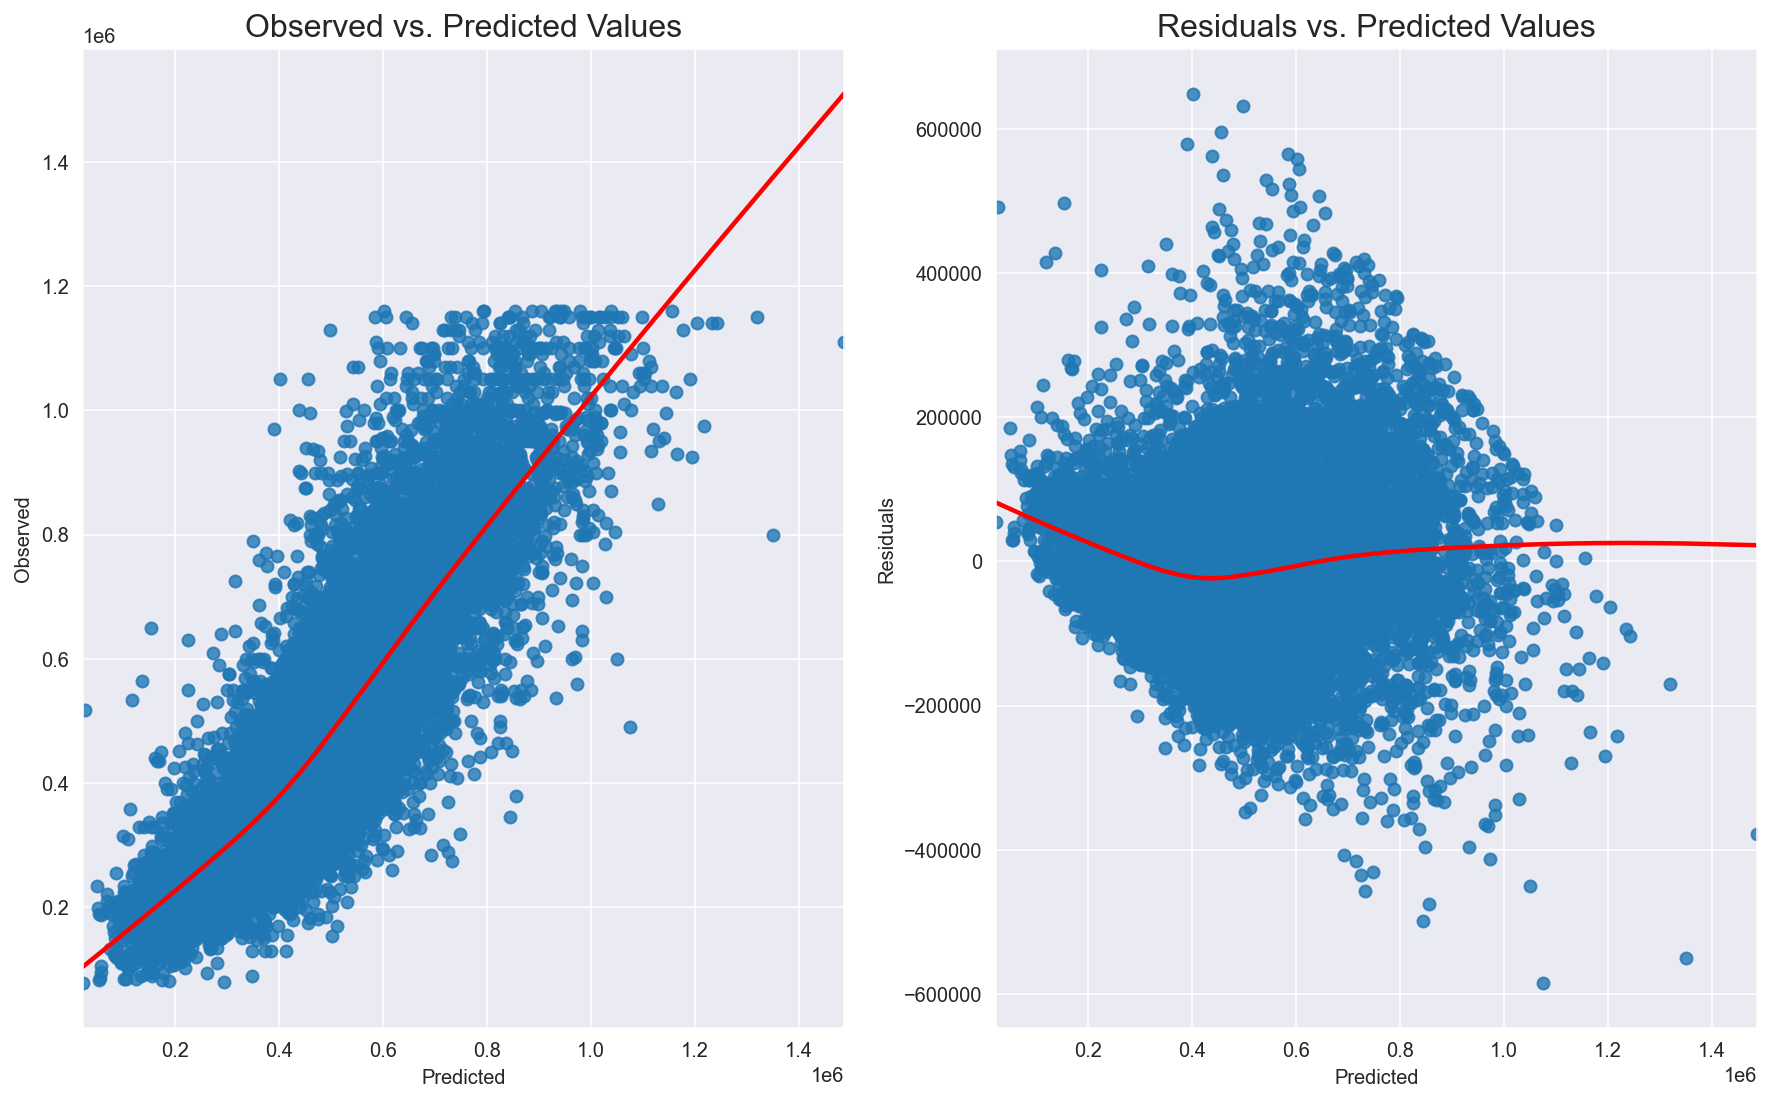

In [765]:
#Investigating the residuals
linearity_test(fourth_model_sum, y_train)

### Fourth Model Analysis
This model was significantly better than the third model. However, there is high vif scores meaning that collinearity is present. Additionally, there are p-value scores above the 5% threshold. To fix this I will problem causing independent variables.

## Fifth Model

For this model I will remove postal zone codes, latitude zones, and features that showed high collinearity and/or high p-value i.e. >.05. I removed the features with comments for a visual reference.

In [713]:
fifth_model_feats = [
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'is_renovated',
 'age',
                     
# 'conditions_condition == 2',
                     
 'conditions_condition == 3',
 'conditions_condition == 4', 
                     
# 'grades_grade == 11',
                     
 'grades_grade == 4',
 'grades_grade == 5',
 'grades_grade == 6',
 'grades_grade == 7',
 'grades_grade == 8',                     
# 'grades_grade == 9',                     
#  'postal_zone_code_zipcode[3] == 1',
#  'postal_zone_code_zipcode[3] == 2',
#  'postal_zone_code_zipcode[3] == 3',       
#  'postal_zone_code_zipcode[3] == 4',
#  'postal_zone_code_zipcode[3] == 5',                     
#  'postal_zone_code_zipcode[3] == 6',
#  'postal_zone_code_zipcode[3] == 7',
#  'postal_zone_code_zipcode[3] == 8',
# 'postal_zone_code_zipcode[3] == 9',
                     
#  'lat_zone_Latitude Zone 2',
#  'lat_zone_Latitude Zone 3',
#  'lat_zone_Latitude Zone 4',
#  'lat_zone_Latitude Zone 5',
                     
# 'lat_long_zone_Zone 2', 
 'lat_long_zone_Zone 3',
 'lat_long_zone_Zone 4',
 'lat_long_zone_Zone 5',
 'lat_long_zone_Zone 8',
 'lat_long_zone_Zone 9'                    
    ]

In [714]:
fifth_model = LinearRegression()
fifth_model.fit(X_train_processed[fifth_model_feats], y_train)
y_pred_train = fifth_model.predict(X_train_processed[fifth_model_feats])
y_pred_test = fifth_model.predict(X_test_processed[fifth_model_feats])

# R^2
fifth_r_train = fifth_model.score(X_train_processed[fifth_model_feats], y_train)
fifth_r_test = fifth_model.score(X_test_processed[fifth_model_feats], y_test)
#MAE
fifth_mae_train = mean_absolute_error(y_train, y_pred_train)
fifth_mae_test = mean_absolute_error(y_test, y_pred_test)

In [715]:
model_summary('fifth')

Current Model
R^2 for train: 0.7234335721985161
R^2 for test: 0.7223059904970338
MAE for train: 82773.82319838912
MAE for test: 82936.19261403797

Fourth Model
R^2 for train: 0.7333698117493889
R^2 for test: 0.7284288741820872
MAE for train: 81429.89939160927
MAE for test: 81880.9074596057


In [716]:
X = sm.add_constant(X_train_processed[fifth_model_feats])
final_model = sm.OLS(y_train.values.reshape(-1,1), X).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2011.
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:54:59   Log-Likelihood:            -2.0077e+05
No. Observations:               15396   AIC:                         4.016e+05
Df Residuals:                   15375   BIC:                         4.017e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.476e+05   8315.740     17.754      0.000    1.31e+05    1.64e+05
bedrooms                  -1.079e+04   1342.926     -8.034      0.000   -1.34e+04   -8156.732
bathrooms                  1.897e+04   2190.509      8.660      0.000    1.47e+04    2.33e+04
sqft_living                 115.5625      2.124     54.396      0.000     111.398     119.727
floors                     2.543e+04   2125.750     11.965      0.000    2.13e+04    2.96e+04
waterfront                 1.954e+05   1.84e+04     10.596      0.000    1.59e+05    2.32e+05
view                       3.449e+04   1492.925     23.100      0.000    3.16e+04    3.74e+04
is_renovated               3.902e+04   5431.853      7.183      0.000    2.84e+04    4.97e+04
age                        1001.1757     46.381     21.586      0.000     910.264    1092.087
conditions_condition == 3  2.942e+04   2252.379     13.060      0.000     2.5e+04    3.38e+04
conditions_condition == 4  5.944e+04   3663.203     16.227      0.000    5.23e+04    6.66e+04
grades_grade == 4         -2.408e+05   2.78e+04     -8.666      0.000   -2.95e+05   -1.86e+05
grades_grade == 5         -2.422e+05   1.07e+04    -22.700      0.000   -2.63e+05   -2.21e+05
grades_grade == 6         -2.347e+05   6430.451    -36.500      0.000   -2.47e+05   -2.22e+05
grades_grade == 7          -1.72e+05   5115.323    -33.631      0.000   -1.82e+05   -1.62e+05
grades_grade == 8         -5.732e+04   5080.213    -11.282      0.000   -6.73e+04   -4.74e+04
lat_long_zone_Zone 3       6.254e+04   2985.531     20.949      0.000    5.67e+04    6.84e+04
lat_long_zone_Zone 4       2.356e+05   2790.714     84.420      0.000     2.3e+05    2.41e+05
lat_long_zone_Zone 5       2.107e+05   2720.136     77.468      0.000    2.05e+05    2.16e+05
lat_long_zone_Zone 8       1.055e+05   9842.876     10.716      0.000    8.62e+04    1.25e+05
lat_long_zone_Zone 9       1.911e+05   4.56e+04      4.187      0.000    1.02e+05    2.81e+05
==============================================================================
Omnibus:                     1654.834   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3796.356
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       5.052   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [717]:
check_collin(fifth_model_feats, X_train_processed)

{'const': 85.54523083753439,
 'bedrooms': 1.7561591819695048,
 'bathrooms': 3.0116627711616673,
 'sqft_living': 3.4346648911114257,
 'floors': 1.6142645633498578,
 'waterfront': 1.0897495149242664,
 'view': 1.1543539520435853,
 'is_renovated': 1.118025448516876,
 'age': 2.264662592769916,
 'conditions_condition == 3': 1.2179827102541831,
 'conditions_condition == 4': 1.170222000405728,
 'grades_grade == 4': 1.0532762384820242,
 'grades_grade == 5': 1.4746699997757655,
 'grades_grade == 6': 4.6208340250475235,
 'grades_grade == 7': 6.413848372309359,
 'grades_grade == 8': 3.2149112903534025,
 'lat_long_zone_Zone 3': 1.678136747002623,
 'lat_long_zone_Zone 4': 2.000160951138973,
 'lat_long_zone_Zone 5': 1.994582935430721,
 'lat_long_zone_Zone 8': 1.0416912944729602,
 'lat_long_zone_Zone 9': 1.0036084796151272}

### Fifth Model Analysis
This model did not improve the last model in terms of MAE and R^2. However, we removed features causing collinearity or having a p-value > .05. This model would be sufficient for our needs. However, in an attempt to get better scores I will scale numeric data and add interactions to the model.

# Scale

I will now use StandardScaler() to scale the following numeric columns.
1. bedrooms
2. bathrooms
3. sqft_living
4. view
5. age

In [718]:
#Scale data
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'age']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed[num_cols])
X_test_scaled = scaler.transform(X_test_processed[num_cols])

In [719]:
#Turn scaled data into a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_cols)

In [720]:
#categorical columns i.e. these are not scaled
X_train_cat = X_train_processed.drop(columns = num_cols)
X_test_cat = X_test_processed.drop(columns = num_cols)

In [721]:
#Reset indices
X_train_scaled.reset_index(inplace=True, drop=True)
X_test_scaled.reset_index(inplace=True, drop=True)
X_train_cat.reset_index(inplace=True, drop=True)
X_test_cat.reset_index(inplace=True, drop=True)

In [722]:
#Concat scaled numeric data with categorical data.
X_train_scaled_processed = pd.concat([X_train_cat , X_train_scaled],axis=1)

X_test_scaled_processed = pd.concat([X_test_cat , X_test_scaled],axis=1)


# Interactions

## Finding Interactions

### Addding Interactions

The code below is commented out because it is very costly in computation. The top 5 interactions are:
1. sqft_living x grades_grade == 7
2. age x grades_grade == 6
3. conditions_condition == 3 x lat_long_Zone 4
4. grades_grade ==6 x lat_long_zone_Zone 4
5. bedrooms x bathrooms

In [723]:
# regression = LinearRegression()
# interactions = []
# crossvalidation = KFold(n_splits=10, shuffle=True,random_state=42)
# X = X_train_scaled_processed[fifth_model_feats]
# y = y_train

# feat_combinations = combinations(X.columns, 2)
# data = X.copy()

# for i, (a, b) in enumerate(feat_combinations):
#     data['interaction'] = data[a] * data[b]
#     score = np.mean(cross_val_score(regression, data, y, scoring='r2',
#                                    cv=crossvalidation))
#     if score > .6:
#         interactions.append((a, b, round(score,3)))
#     if i % 50 == 0:
#         print(i)


In [724]:
# print('Top 5 interactions: %s' %sorted(interactions, key=lambda inter: inter[2],
#                                       reverse=True)[:5])

In [725]:
#Adding interaction to train data based on train data
X_train_scaled_processed['sqft_living * grades_grade == 7'] = \
    X_train_scaled_processed['sqft_living'] * X_train_scaled_processed['grades_grade == 7']

X_train_scaled_processed['age * grades_grade == 6'] = \
    X_train_scaled_processed['age'] * X_train_scaled_processed['grades_grade == 6']

X_train_scaled_processed['conditions_condition == 3 * lat_long_zone_Zone 4'] = \
    X_train_scaled_processed['conditions_condition == 3'] * X_train_scaled_processed['lat_long_zone_Zone 4']

X_train_scaled_processed['grades_grade == 6 * lat_long_zone_Zone 4'] = \
    X_train_processed['grades_grade == 6'] * X_train_scaled_processed['lat_long_zone_Zone 4']

X_train_scaled_processed['bedrooms * bathrooms'] = \
    X_train_scaled_processed['bedrooms'] * X_train_scaled_processed['bathrooms']

#Adding interactions to test data based on test data
X_test_scaled_processed['sqft_living * grades_grade == 7'] = \
    X_test_scaled_processed['sqft_living'] * X_test_scaled_processed['grades_grade == 7']

X_test_scaled_processed['age * grades_grade == 6'] = \
    X_test_scaled_processed['age'] * X_test_scaled_processed['grades_grade == 6']

X_test_scaled_processed['conditions_condition == 3 * lat_long_zone_Zone 4'] = \
    X_test_scaled_processed['conditions_condition == 3'] * X_test_scaled_processed['lat_long_zone_Zone 4']

X_test_scaled_processed['grades_grade == 6 * lat_long_zone_Zone 4'] = \
    X_test_scaled_processed['grades_grade == 6'] * X_test_scaled_processed['lat_long_zone_Zone 4']

X_test_scaled_processed['bedrooms * bathrooms'] = \
    X_test_scaled_processed['bedrooms'] * X_test_scaled_processed['bathrooms']


# Modeling

## Sixth Model

This model will be the same as the 5th model except the numerical data has been scaled and I have added the top 5 interactions. 

In [726]:
sixth_model_feats = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'is_renovated',
 'age',
# 'conditions_condition == 2',
 'conditions_condition == 3',
 'conditions_condition == 4', 
# 'grades_grade == 11',
 'grades_grade == 4',
 'grades_grade == 5',
 'grades_grade == 6',
 'grades_grade == 7',
 'grades_grade == 8',
# 'grades_grade == 9',
#  'postal_zone_code_zipcode[3] == 1',
#  'postal_zone_code_zipcode[3] == 2',
#  'postal_zone_code_zipcode[3] == 3',       
#  'postal_zone_code_zipcode[3] == 4',
#  'postal_zone_code_zipcode[3] == 5',                     
#  'postal_zone_code_zipcode[3] == 6',
#  'postal_zone_code_zipcode[3] == 7',
#  'postal_zone_code_zipcode[3] == 8',
# 'postal_zone_code_zipcode[3] == 9',
#  'lat_zone_Latitude Zone 2',
#  'lat_zone_Latitude Zone 3',
#  'lat_zone_Latitude Zone 4',
#  'lat_zone_Latitude Zone 5',
# 'lat_long_zone_Zone 2', 
 'lat_long_zone_Zone 3',
 'lat_long_zone_Zone 4',
 'lat_long_zone_Zone 5',
 'lat_long_zone_Zone 8',
 'lat_long_zone_Zone 9',
 'sqft_living * grades_grade == 7',
 'age * grades_grade == 6',
 'conditions_condition == 3 * lat_long_zone_Zone 4',
 'grades_grade == 6 * lat_long_zone_Zone 4',
 'bedrooms * bathrooms']

In [727]:
sixth_model = LinearRegression()
sixth_model.fit(X_train_scaled_processed[sixth_model_feats], y_train)
y_pred_train = sixth_model.predict(X_train_scaled_processed[sixth_model_feats])
y_pred_test = sixth_model.predict(X_test_scaled_processed[sixth_model_feats])

# R^2
sixth_r_train = sixth_model.score(X_train_scaled_processed[sixth_model_feats], y_train)
sixth_r_test = sixth_model.score(X_test_scaled_processed[sixth_model_feats], y_test)
#MAE
sixth_mae_train = mean_absolute_error(y_train, y_pred_train)
sixth_mae_test = mean_absolute_error(y_test, y_pred_test)


In [728]:
model_summary('sixth')

Current Model
R^2 for train: 0.7298084264559859
R^2 for test: 0.7285330167878888
MAE for train: 81833.29323551166
MAE for test: 81788.13021848458

Fifth Model
R^2 for train: 0.7234335721985161
R^2 for test: 0.7223059904970338
MAE for train: 82773.82319838912
MAE for test: 82936.19261403797


In [729]:
#Inspecting collinearity between independent variables
check_collin(sixth_model_feats, X_train_scaled_processed)

{'const': 69.0491214451158,
 'bedrooms': 1.778613739007179,
 'bathrooms': 3.1215412952883295,
 'sqft_living': 7.792166017905748,
 'floors': 1.6432146603524524,
 'waterfront': 1.0907086260376508,
 'view': 1.1554980422210863,
 'is_renovated': 1.123517618781292,
 'age': 2.4937835493602085,
 'conditions_condition == 3': 1.6185633086941031,
 'conditions_condition == 4': 1.1836834170188728,
 'grades_grade == 4': 1.1343512694130922,
 'grades_grade == 5': 2.0315463445090756,
 'grades_grade == 6': 10.11027223393561,
 'grades_grade == 7': 9.651858908641014,
 'grades_grade == 8': 3.5188178001057326,
 'lat_long_zone_Zone 3': 1.6905590114819837,
 'lat_long_zone_Zone 4': 2.4567634942012404,
 'lat_long_zone_Zone 5': 2.0012720445572127,
 'lat_long_zone_Zone 8': 1.0426388621316576,
 'lat_long_zone_Zone 9': 1.0042346865237364,
 'sqft_living * grades_grade == 7': 3.8868881892668234,
 'age * grades_grade == 6': 3.1397368432808057,
 'conditions_condition == 3 * lat_long_zone_Zone 4': 1.754972312248401,
 'g

In [730]:
#Statistacal summary
X = sm.add_constant(X_train_scaled_processed[sixth_model_feats])
sixth_model_sum = sm.OLS(y_train.values.reshape(-1,1), X).fit()
sixth_model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1661.
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:55:00   Log-Likelihood:            -2.0059e+05
No. Observations:               15396   AIC:                         4.012e+05
Df Residuals:                   15370   BIC:                         4.014e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             4.748e+05   7385.652     64.287      0.000     4.6e+05    4.89e+05
bedrooms                                         -1.078e+04   1185.361     -9.097      0.000   -1.31e+04   -8459.868
bathrooms                                         1.461e+04   1570.342      9.302      0.000    1.15e+04    1.77e+04
sqft_living                                       7.435e+04   2481.069     29.966      0.000    6.95e+04    7.92e+04
floors                                            2.559e+04   2120.209     12.072      0.000    2.14e+04    2.98e+04
waterfront                                        1.931e+05   1.82e+04     10.590      0.000    1.57e+05    2.29e+05
view                                              2.187e+04    955.420     22.890      0.000       2e+04    2.37e+04
is_renovated                                       3.51e+04   5382.932      6.520      0.000    2.45e+04    4.56e+04
age                                               3.312e+04   1403.586     23.598      0.000    3.04e+04    3.59e+04
conditions_condition == 3                         1.365e+04   2566.804      5.319      0.000    8622.680    1.87e+04
conditions_condition == 4                          5.51e+04   3642.097     15.129      0.000     4.8e+04    6.22e+04
grades_grade == 4                                -2.997e+05   2.85e+04    -10.516      0.000   -3.56e+05   -2.44e+05
grades_grade == 5                                -2.952e+05   1.24e+04    -23.847      0.000   -3.19e+05   -2.71e+05
grades_grade == 6                                -2.422e+05   9403.066    -25.755      0.000   -2.61e+05   -2.24e+05
grades_grade == 7                                -2.052e+05   6203.346    -33.076      0.000   -2.17e+05   -1.93e+05
grades_grade == 8                                 -7.26e+04   5254.151    -13.818      0.000   -8.29e+04   -6.23e+04
lat_long_zone_Zone 3                              6.054e+04   2962.305     20.437      0.000    5.47e+04    6.63e+04
lat_long_zone_Zone 4                              2.283e+05   3057.534     74.677      0.000    2.22e+05    2.34e+05
lat_long_zone_Zone 5                              2.107e+05   2693.547     78.215      0.000    2.05e+05    2.16e+05
lat_long_zone_Zone 8                              1.053e+05   9734.783     10.814      0.000    8.62e+04    1.24e+05
lat_long_zone_Zone 9                              1.788e+05   4.51e+04      3.963      0.000    9.04e+04    2.67e+05
sqft_living * grades_grade == 7                   2.364e+04   2705.085      8.738      0.000    1.83e+04    2.89e+04
age * grades_grade == 6                          -3.024e+04   4258.732     -7.100      0.000   -3.86e+04   -2.19e+04
conditions_condition == 3 * lat_long_zone

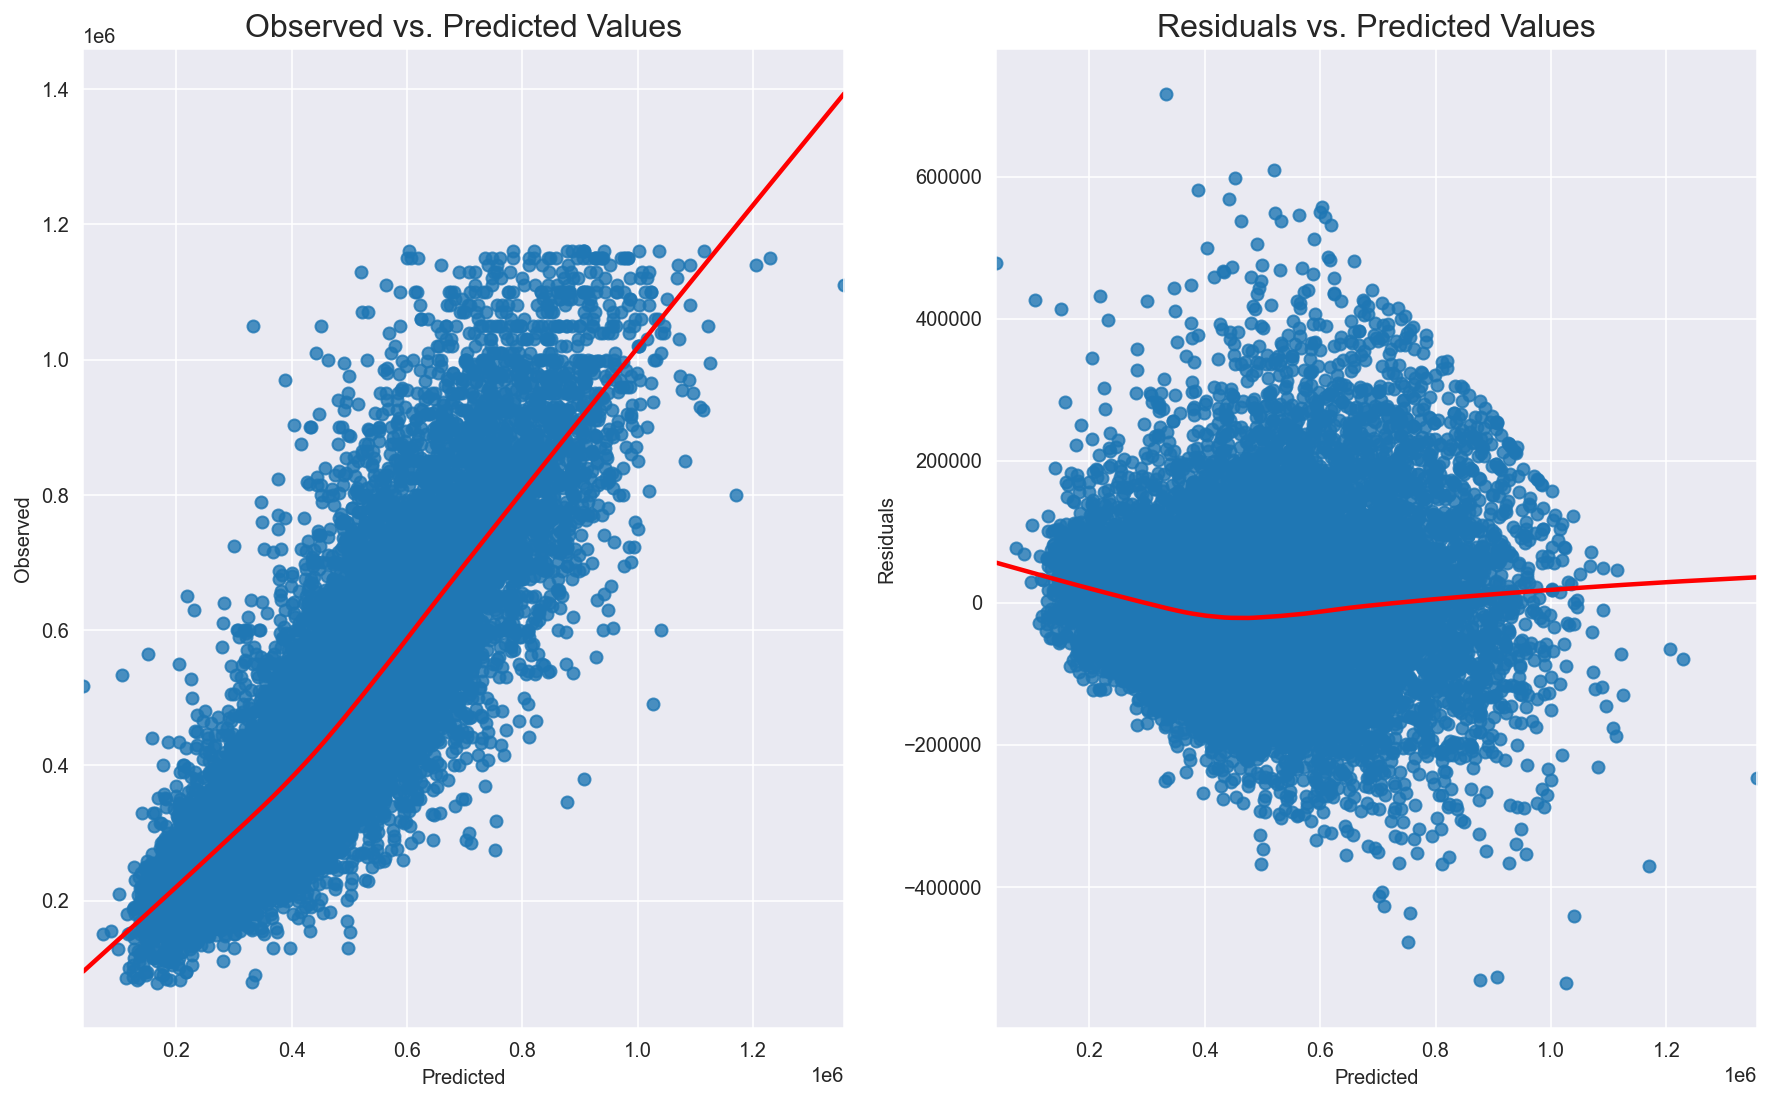

In [766]:
#Inspeecting residuals
linearity_test(sixth_model_sum, y_train)

### Sixth Model Analysis
This model has a slightly better R^2 square and slightly better MAE. However, adding these values seems to be mostly inconsequential. Because of this and the increased complexity introduced by the interactions I will use the fifth model for the business analysis.

# Final Model Validation

In [732]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2011.
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:55:23   Log-Likelihood:            -2.0077e+05
No. Observations:               15396   AIC:                         4.016e+05
Df Residuals:                   15375   BIC:                         4.017e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.476e+05   8315.740     17.754      0.000    1.31e+05    1.64e+05
bedrooms                  -1.079e+04   1342.926     -8.034      0.000   -1.34e+04   -8156.732
bathrooms                  1.897e+04   2190.509      8.660      0.000    1.47e+04    2.33e+04
sqft_living                 115.5625      2.124     54.396      0.000     111.398     119.727
floors                     2.543e+04   2125.750     11.965      0.000    2.13e+04    2.96e+04
waterfront                 1.954e+05   1.84e+04     10.596      0.000    1.59e+05    2.32e+05
view                       3.449e+04   1492.925     23.100      0.000    3.16e+04    3.74e+04
is_renovated               3.902e+04   5431.853      7.183      0.000    2.84e+04    4.97e+04
age                        1001.1757     46.381     21.586      0.000     910.264    1092.087
conditions_condition == 3  2.942e+04   2252.379     13.060      0.000     2.5e+04    3.38e+04
conditions_condition == 4  5.944e+04   3663.203     16.227      0.000    5.23e+04    6.66e+04
grades_grade == 4         -2.408e+05   2.78e+04     -8.666      0.000   -2.95e+05   -1.86e+05
grades_grade == 5         -2.422e+05   1.07e+04    -22.700      0.000   -2.63e+05   -2.21e+05
grades_grade == 6         -2.347e+05   6430.451    -36.500      0.000   -2.47e+05   -2.22e+05
grades_grade == 7          -1.72e+05   5115.323    -33.631      0.000   -1.82e+05   -1.62e+05
grades_grade == 8         -5.732e+04   5080.213    -11.282      0.000   -6.73e+04   -4.74e+04
lat_long_zone_Zone 3       6.254e+04   2985.531     20.949      0.000    5.67e+04    6.84e+04
lat_long_zone_Zone 4       2.356e+05   2790.714     84.420      0.000     2.3e+05    2.41e+05
lat_long_zone_Zone 5       2.107e+05   2720.136     77.468      0.000    2.05e+05    2.16e+05
lat_long_zone_Zone 8       1.055e+05   9842.876     10.716      0.000    8.62e+04    1.25e+05
lat_long_zone_Zone 9       1.911e+05   4.56e+04      4.187      0.000    1.02e+05    2.81e+05
==============================================================================
Omnibus:                     1654.834   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3796.356
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       5.052   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-733-cb33f0d3e314>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


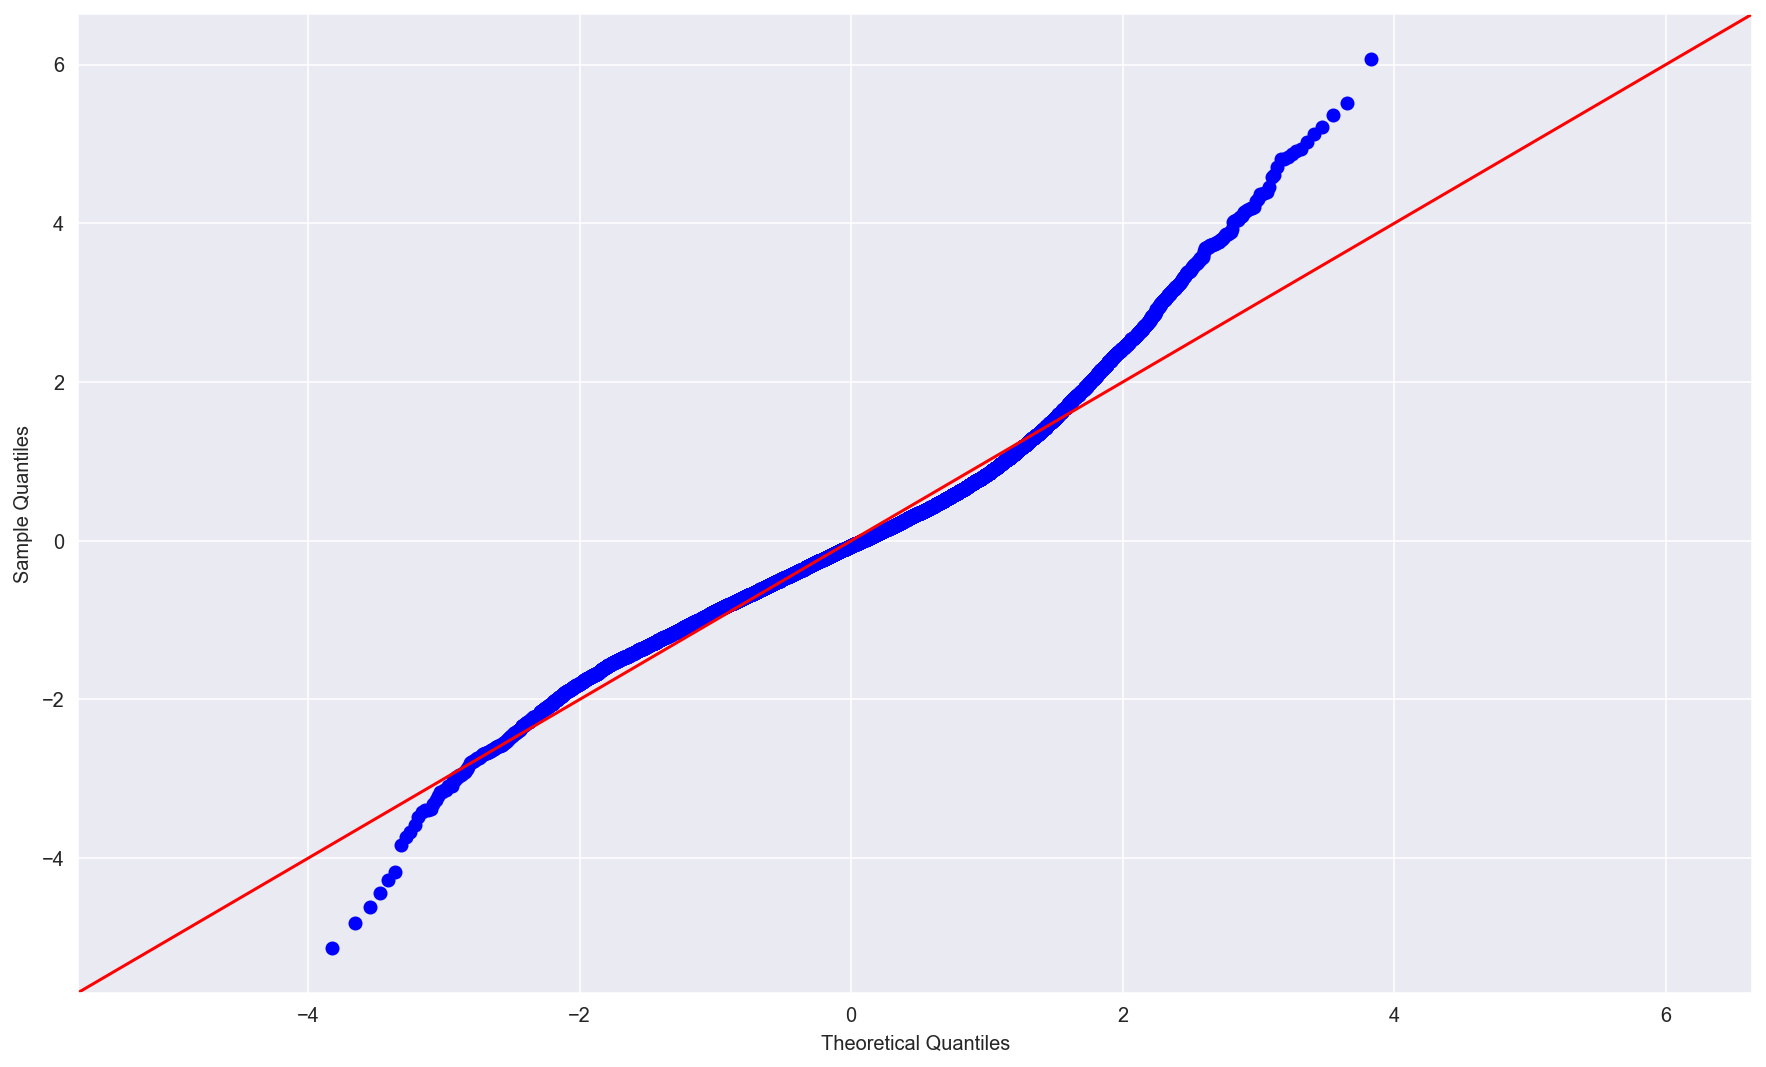

In [733]:
residuals = final_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, 
                        line = '45', fit=True)
fig.show()

## Linearity of the residuals & homoscedasticity 

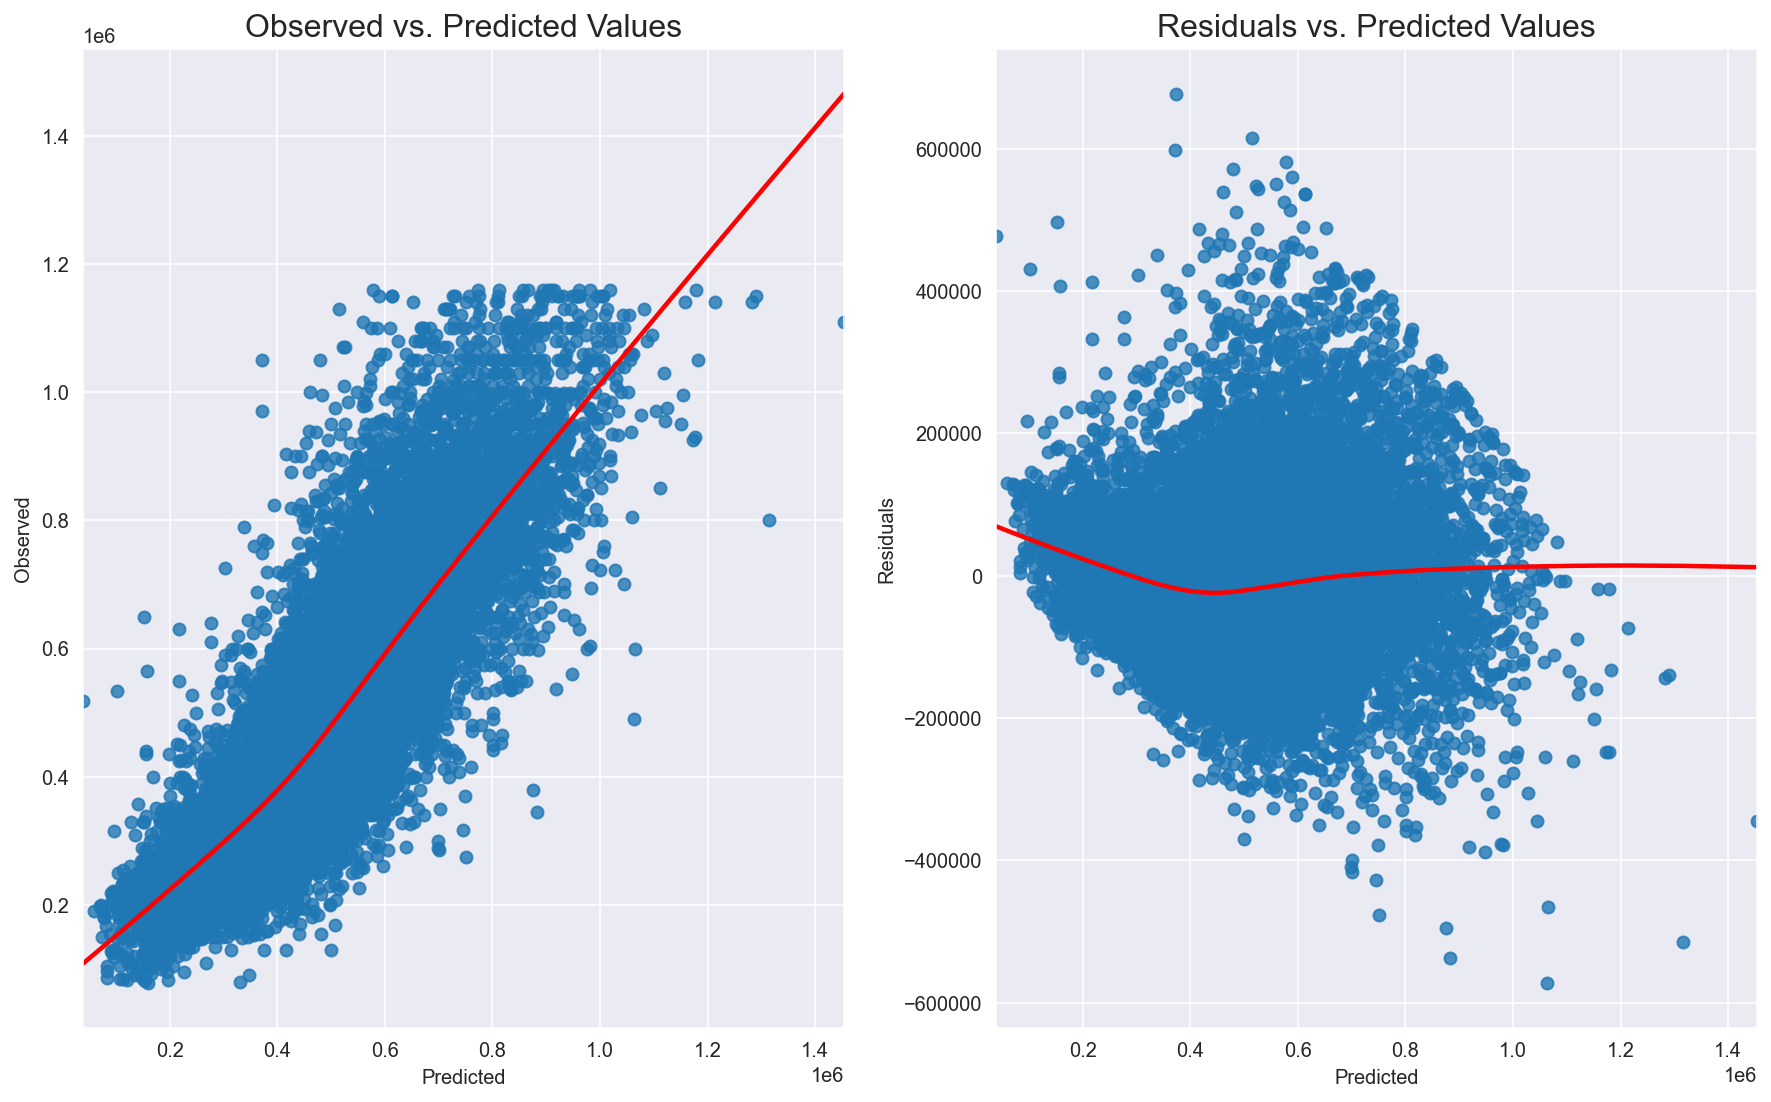

In [734]:
linearity_test(final_model, y_train)

## Collinearity

In [735]:
check_collin(fifth_model_feats, X_train_processed)

{'const': 85.54523083753439,
 'bedrooms': 1.7561591819695048,
 'bathrooms': 3.0116627711616673,
 'sqft_living': 3.4346648911114257,
 'floors': 1.6142645633498578,
 'waterfront': 1.0897495149242664,
 'view': 1.1543539520435853,
 'is_renovated': 1.118025448516876,
 'age': 2.264662592769916,
 'conditions_condition == 3': 1.2179827102541831,
 'conditions_condition == 4': 1.170222000405728,
 'grades_grade == 4': 1.0532762384820242,
 'grades_grade == 5': 1.4746699997757655,
 'grades_grade == 6': 4.6208340250475235,
 'grades_grade == 7': 6.413848372309359,
 'grades_grade == 8': 3.2149112903534025,
 'lat_long_zone_Zone 3': 1.678136747002623,
 'lat_long_zone_Zone 4': 2.000160951138973,
 'lat_long_zone_Zone 5': 1.994582935430721,
 'lat_long_zone_Zone 8': 1.0416912944729602,
 'lat_long_zone_Zone 9': 1.0036084796151272}

## Final Analysis
These results confirm that this model is valid. There is still some heteroscedasticity, but this is expected because of the higher end of home prices i.e. $1,000,000 - $1,600,000. It is unnecessary to fix this considering the scope of the project.

# Business Analysis

In [736]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2011.
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:55:45   Log-Likelihood:            -2.0077e+05
No. Observations:               15396   AIC:                         4.016e+05
Df Residuals:                   15375   BIC:                         4.017e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.476e+05   8315.740     17.754      0.000    1.31e+05    1.64e+05
bedrooms                  -1.079e+04   1342.926     -8.034      0.000   -1.34e+04   -8156.732
bathrooms                  1.897e+04   2190.509      8.660      0.000    1.47e+04    2.33e+04
sqft_living                 115.5625      2.124     54.396      0.000     111.398     119.727
floors                     2.543e+04   2125.750     11.965      0.000    2.13e+04    2.96e+04
waterfront                 1.954e+05   1.84e+04     10.596      0.000    1.59e+05    2.32e+05
view                       3.449e+04   1492.925     23.100      0.000    3.16e+04    3.74e+04
is_renovated               3.902e+04   5431.853      7.183      0.000    2.84e+04    4.97e+04
age                        1001.1757     46.381     21.586      0.000     910.264    1092.087
conditions_condition == 3  2.942e+04   2252.379     13.060      0.000     2.5e+04    3.38e+04
conditions_condition == 4  5.944e+04   3663.203     16.227      0.000    5.23e+04    6.66e+04
grades_grade == 4         -2.408e+05   2.78e+04     -8.666      0.000   -2.95e+05   -1.86e+05
grades_grade == 5         -2.422e+05   1.07e+04    -22.700      0.000   -2.63e+05   -2.21e+05
grades_grade == 6         -2.347e+05   6430.451    -36.500      0.000   -2.47e+05   -2.22e+05
grades_grade == 7          -1.72e+05   5115.323    -33.631      0.000   -1.82e+05   -1.62e+05
grades_grade == 8         -5.732e+04   5080.213    -11.282      0.000   -6.73e+04   -4.74e+04
lat_long_zone_Zone 3       6.254e+04   2985.531     20.949      0.000    5.67e+04    6.84e+04
lat_long_zone_Zone 4       2.356e+05   2790.714     84.420      0.000     2.3e+05    2.41e+05
lat_long_zone_Zone 5       2.107e+05   2720.136     77.468      0.000    2.05e+05    2.16e+05
lat_long_zone_Zone 8       1.055e+05   9842.876     10.716      0.000    8.62e+04    1.25e+05
lat_long_zone_Zone 9       1.911e+05   4.56e+04      4.187      0.000    1.02e+05    2.81e+05
==============================================================================
Omnibus:                     1654.834   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3796.356
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       5.052   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Coefficient interpretations  

For every 1 unit increase in age, price increases $1001.1757

For every 1 unit increase in sqft_living, price increases $115.5625

For every 1 unit increase of floors, price increases $25,430.0

Having a house with a waterfront rather than not, price increases $195,400.

Getting a renovation rather than not, price increases $39,020

For every 1 unit increase in views, price increases $34,490.0

## Lat_long_zone interpretation 

For this interpretation I will only use zones 2,3,4,5 because they have enough values to do get confidence intervals.

In [737]:
og_df['lat_long_zone'].value_counts()

Zone 5     6600
Zone 4     6070
Zone 2     3857
Zone 3     3787
Zone 8      190
Zone 10      16
Zone 9        9
Name: lat_long_zone, dtype: int64

### price per zone

In [738]:
zone_two_price = og_df[og_df['lat_long_zone']=='Zone 2'].price

zone_three_price = og_df[og_df['lat_long_zone']=='Zone 3'].price

zone_four_price = og_df[og_df['lat_long_zone']=='Zone 4'].price

zone_five_price = og_df[og_df['lat_long_zone']=='Zone 5'].price

zone_prices = [zone_two_price, zone_three_price, zone_four_price, zone_five_price]

### confidence intervals of price per zone

In [739]:
i = 1
intervals = []
for zone in zone_prices:
    i += 1
    interval = mean_confidence_interval(zone)
    print("Zone "+ str(i) +" mean price ", interval[0])
    print("Zone "+ str(i) +" lower range interval ", interval[1])
    print("Zone "+ str(i) +" upper range interval ", interval[2])
    intervals.append(interval[1])
    intervals.append(interval[2])
    print()

Zone 2 mean price  310005.1765620949
Zone 2 lower range interval  306379.5843513697
Zone 2 upper range interval  313630.76877282007

Zone 3 mean price  366047.29310800106
Zone 3 lower range interval  360832.0514508231
Zone 3 upper range interval  371262.53476517904

Zone 4 mean price  599958.6085667216
Zone 4 lower range interval  594615.0206791953
Zone 4 upper range interval  605302.1964542478

Zone 5 mean price  535792.9765151516
Zone 5 lower range interval  531372.3317513323
Zone 5 upper range interval  540213.6212789709



In [740]:
zone_2_to_3 = (round(intervals[3]-intervals[1]), round(intervals[2] - intervals[0]))
zone_2_to_4 = (round(intervals[5] - intervals[1]), round(intervals[4] - intervals[0]))
zone_2_to_5 = (round(intervals[7] - intervals[1]), round(intervals[6] - intervals[0]))

In [741]:
zone_2_to_3, zone_2_to_4, zone_2_to_5

((57632.0, 54452.0), (291671.0, 288235.0), (226583.0, 224993.0))

### Visualization

In [742]:
price_increase = {
    "Zone 2 to Zone 3": zone_three_price.mean() - zone_two_price.mean(),
    "Zone 2 to Zone 4": zone_four_price.mean() - zone_two_price.mean(),
    "Zone 2 to Zone 5": zone_five_price.mean() - zone_two_price.mean(),
 
}


Text(0.5, 0, 'Zone Change')

<Figure size 576x720 with 0 Axes>

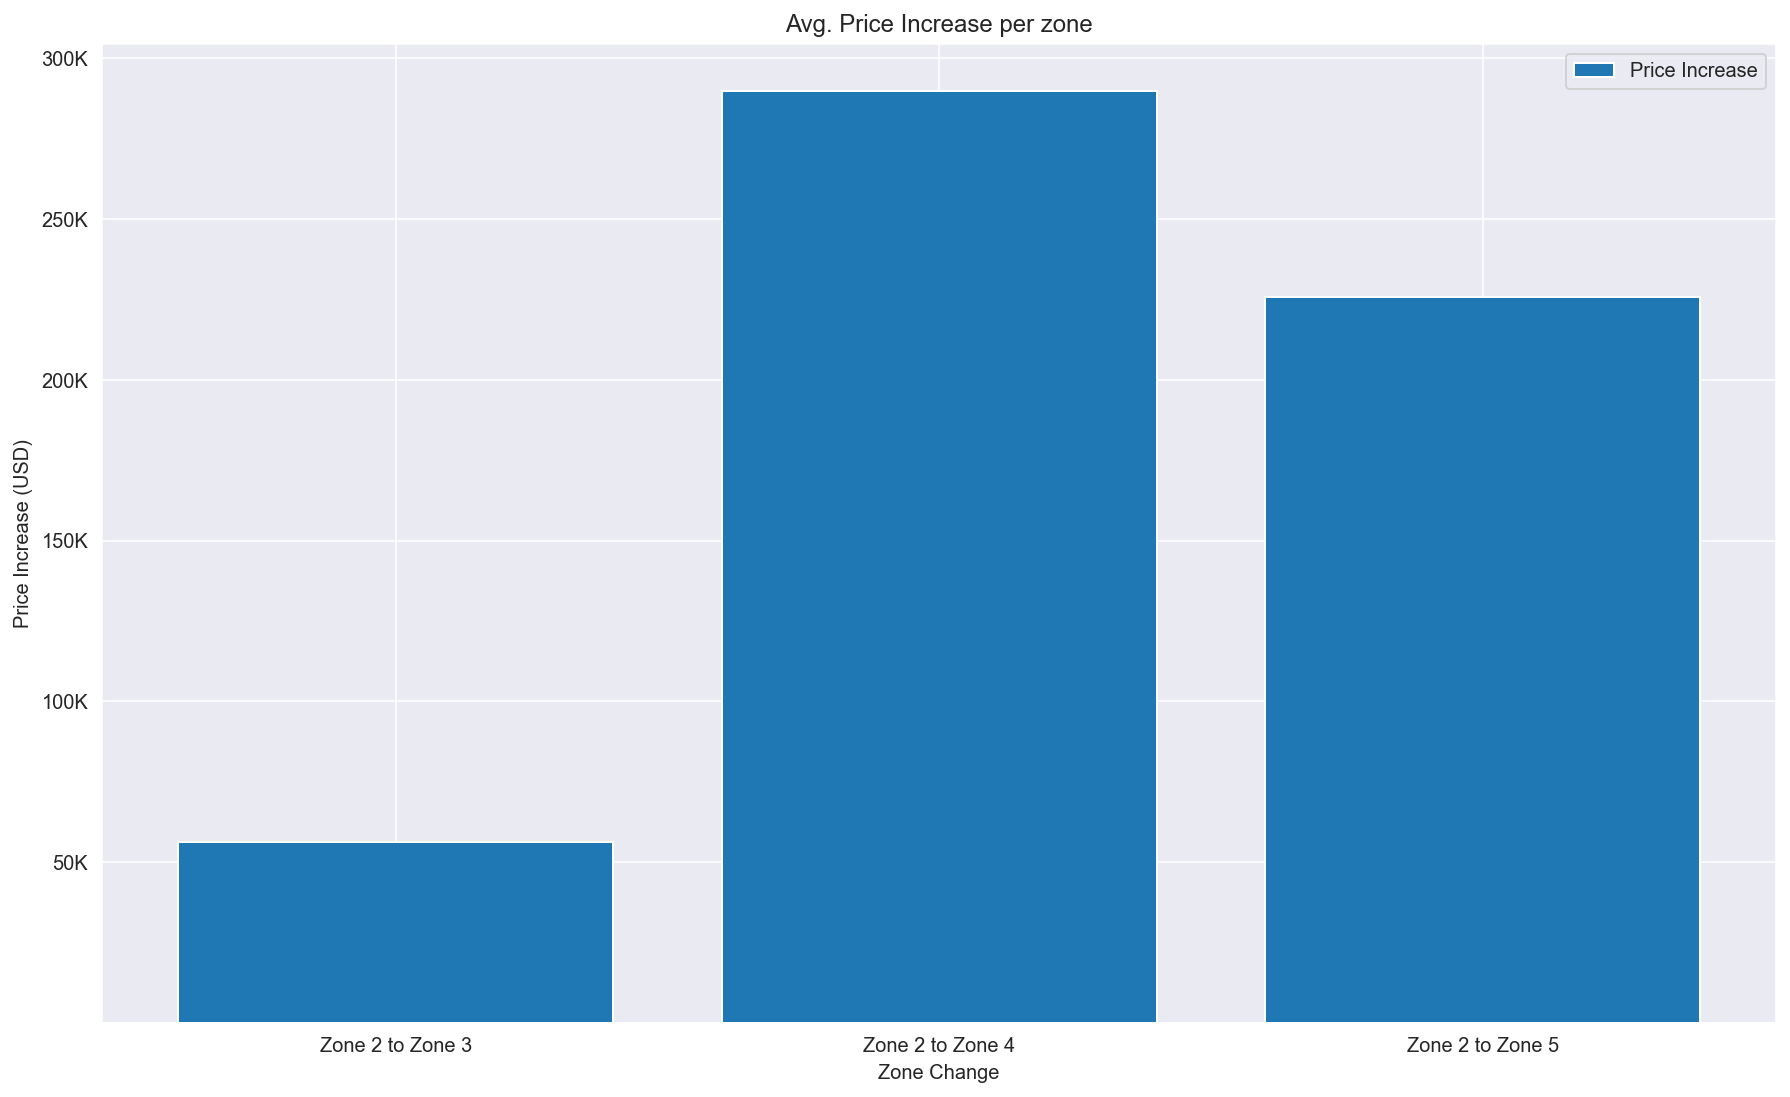

In [743]:

ax = plt.figure(figsize=(8, 10))
X = price_increase.keys()
y = price_increase.values()


fig, ax = plt.subplots()

ax.bar(price_increase.keys(), price_increase.values(), label="Price Increase")
ax.yaxis.set_major_formatter(format_num)
ax.legend()
plt.title("Avg. Price Increase per zone")
plt.ylabel("Price Increase (USD)")
plt.xlabel("Zone Change")

### Stakeholder translation

In [767]:
print("Houses in Zone 3, on average, are  $"+ \
      str(zone_2_to_3[1]) +" to $" +str(zone_2_to_3[0]) + \
          " greater in price than houses in zone 2")
print("Houses in Zone 4, on average, are  $"+ \
      str(zone_2_to_4[1]) +" to $" +str(zone_2_to_4[0]) + \
          " greater in price than houses in zone 2")
print("Houses in Zone 5, on average, are  $"+ \
      str(zone_2_to_5[1]) +" to $" +str(zone_2_to_5[0]) + \
          " greater in price than houses in zone 2")


Houses in Zone 3, on average, are  $54452.0 to $57632.0 greater in price than houses in zone 2
Houses in Zone 4, on average, are  $288235.0 to $291671.0 greater in price than houses in zone 2
Houses in Zone 5, on average, are  $224993.0 to $226583.0 greater in price than houses in zone 2


## is_renovated

### Comparing house prices of renovated vs unrenovated homes considering location and square feet.

In [745]:
#632 total renovated homes
og_df.is_renovated.value_counts()

0    19898
1      631
Name: is_renovated, dtype: int64

In [746]:
#Number of renovated homes per zone
og_df.loc[ (og_df.is_renovated==1)].lat_long_zone.value_counts()

Zone 4     227
Zone 5     209
Zone 3     114
Zone 2      76
Zone 8       3
Zone 10      1
Zone 9       1
Name: lat_long_zone, dtype: int64

In [747]:
#Mean price of renovated homes in zone 4
og_df.loc[ (og_df.is_renovated==1) & (og_df['lat_long_zone'] == 'Zone 4')].price.mean()

681295.5022026432

In [748]:
#renovated homes in zone 4
renovated_homes = og_df.loc[ (og_df.is_renovated==1) & (og_df['lat_long_zone'] == 'Zone 4')]

In [749]:
#Max sqft_living of renovated homes in zone 4
og_df.loc[ (og_df.is_renovated==1) & (og_df['lat_long_zone'] == 'Zone 4')].sqft_living.max()

4060

In [750]:
#Min sqft_living of renovated homes in zone 4
og_df.loc[ (og_df.is_renovated==1) & (og_df['lat_long_zone'] == 'Zone 4')].sqft_living.min()

670

In [751]:
# Unrenovated homes in zone 4 with sqft_living > 670 and <= 4060
unrenovated_homes = og_df.loc[(og_df['lat_long_zone'] == "Zone 4") & (og_df.is_renovated==0) & \
          ( og_df.sqft_living > 670)& (og_df.sqft_living <= 4060)]

#### Recap
Renovated Homes is a dataframe containing homes in Zone 4 that have been renovated.
Unrenovated Homes is a dataframe containing homes in Zone 4 that have not been renovated and
sqft_living are within the range renovated_homes.sqft_living.min() - renovated_homes.sqft_living.min().

Renovated Homes is 227 items long
Unrenovated Homes is 5681 items long. I will need to sample Unrenovated homes to get an accurate understanding of the data.


### Visualization

<Figure size 720x720 with 0 Axes>

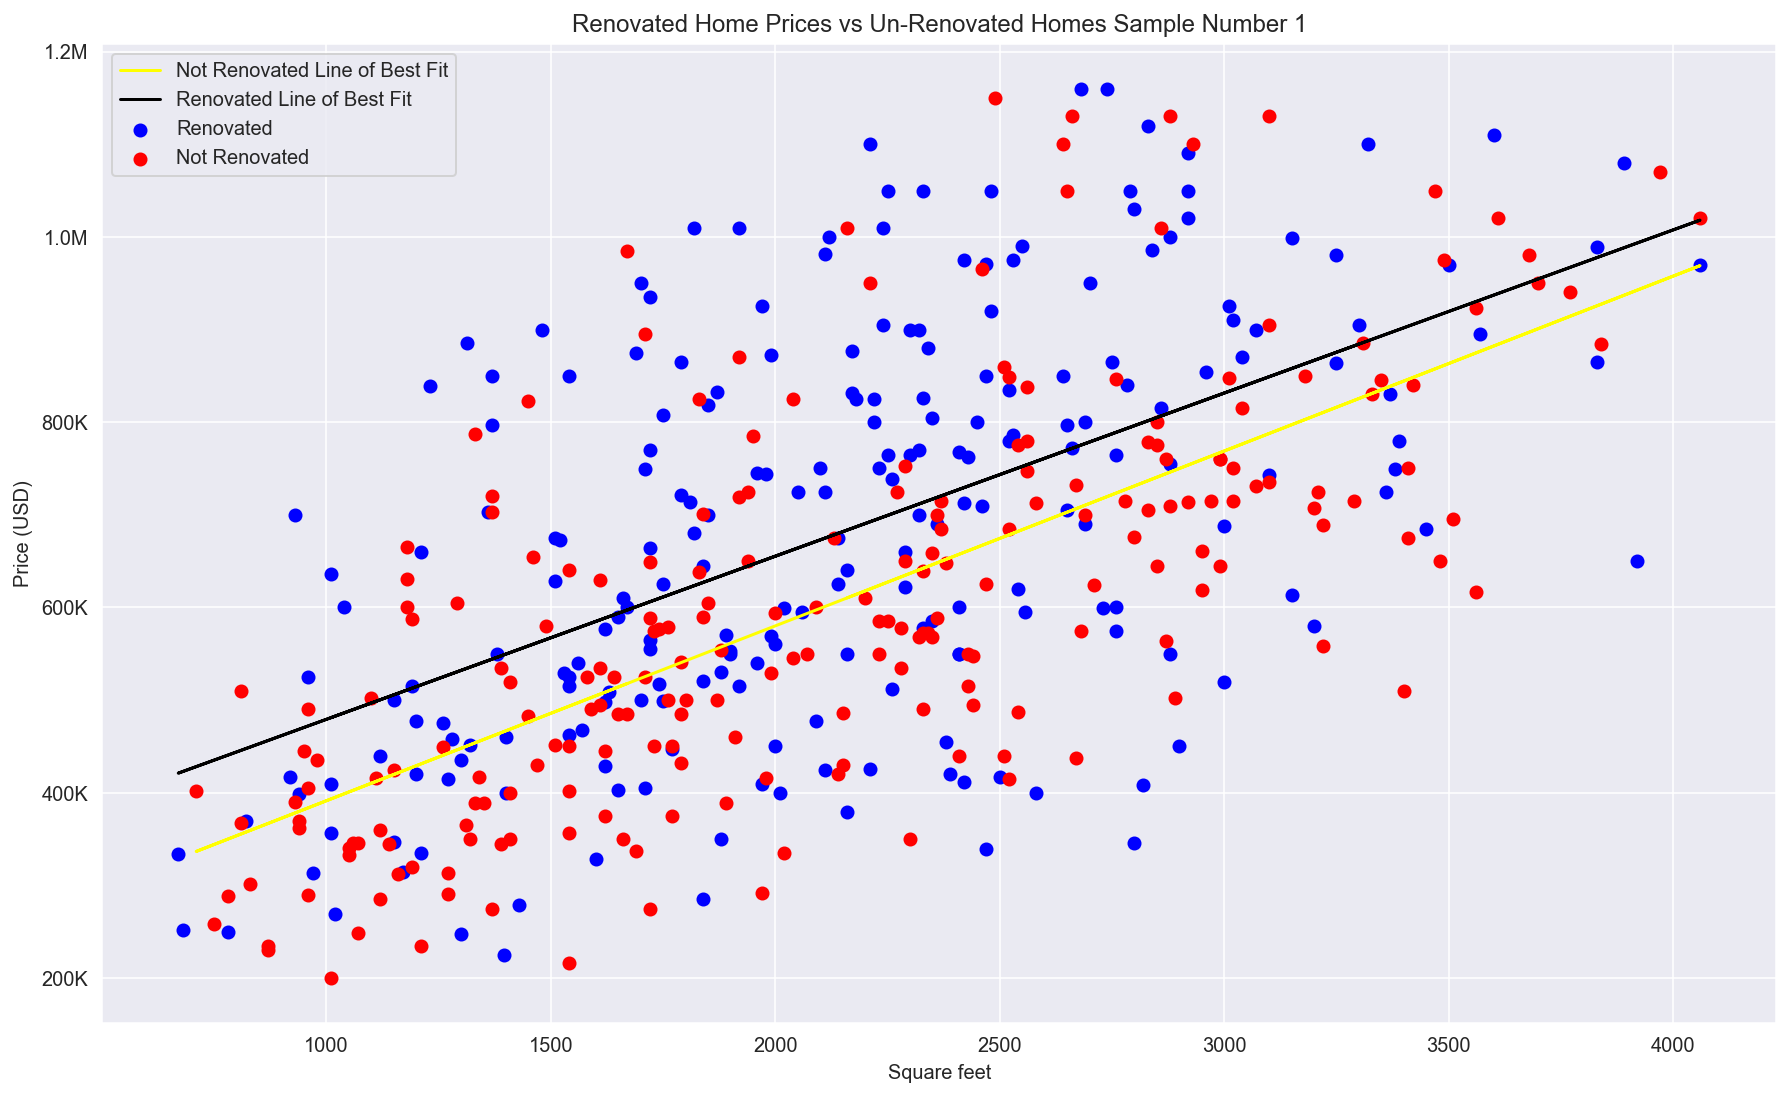

<Figure size 720x720 with 0 Axes>

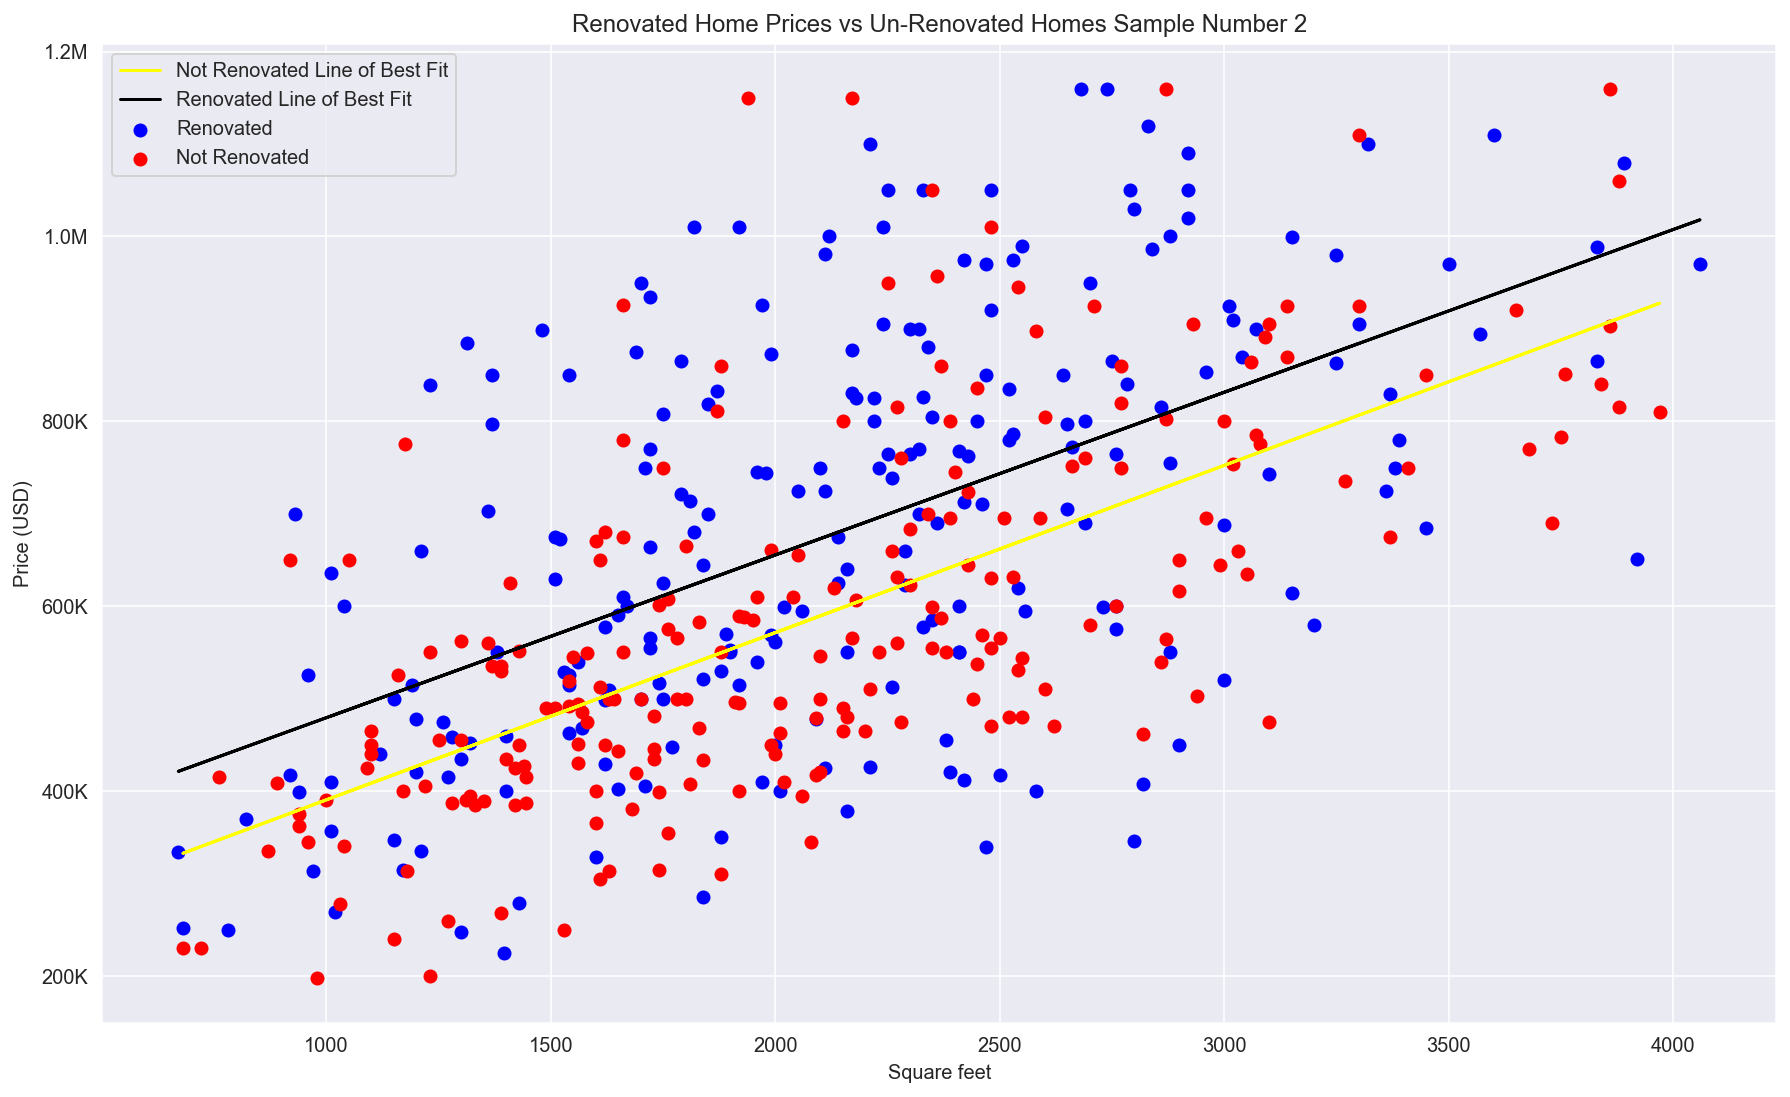

<Figure size 720x720 with 0 Axes>

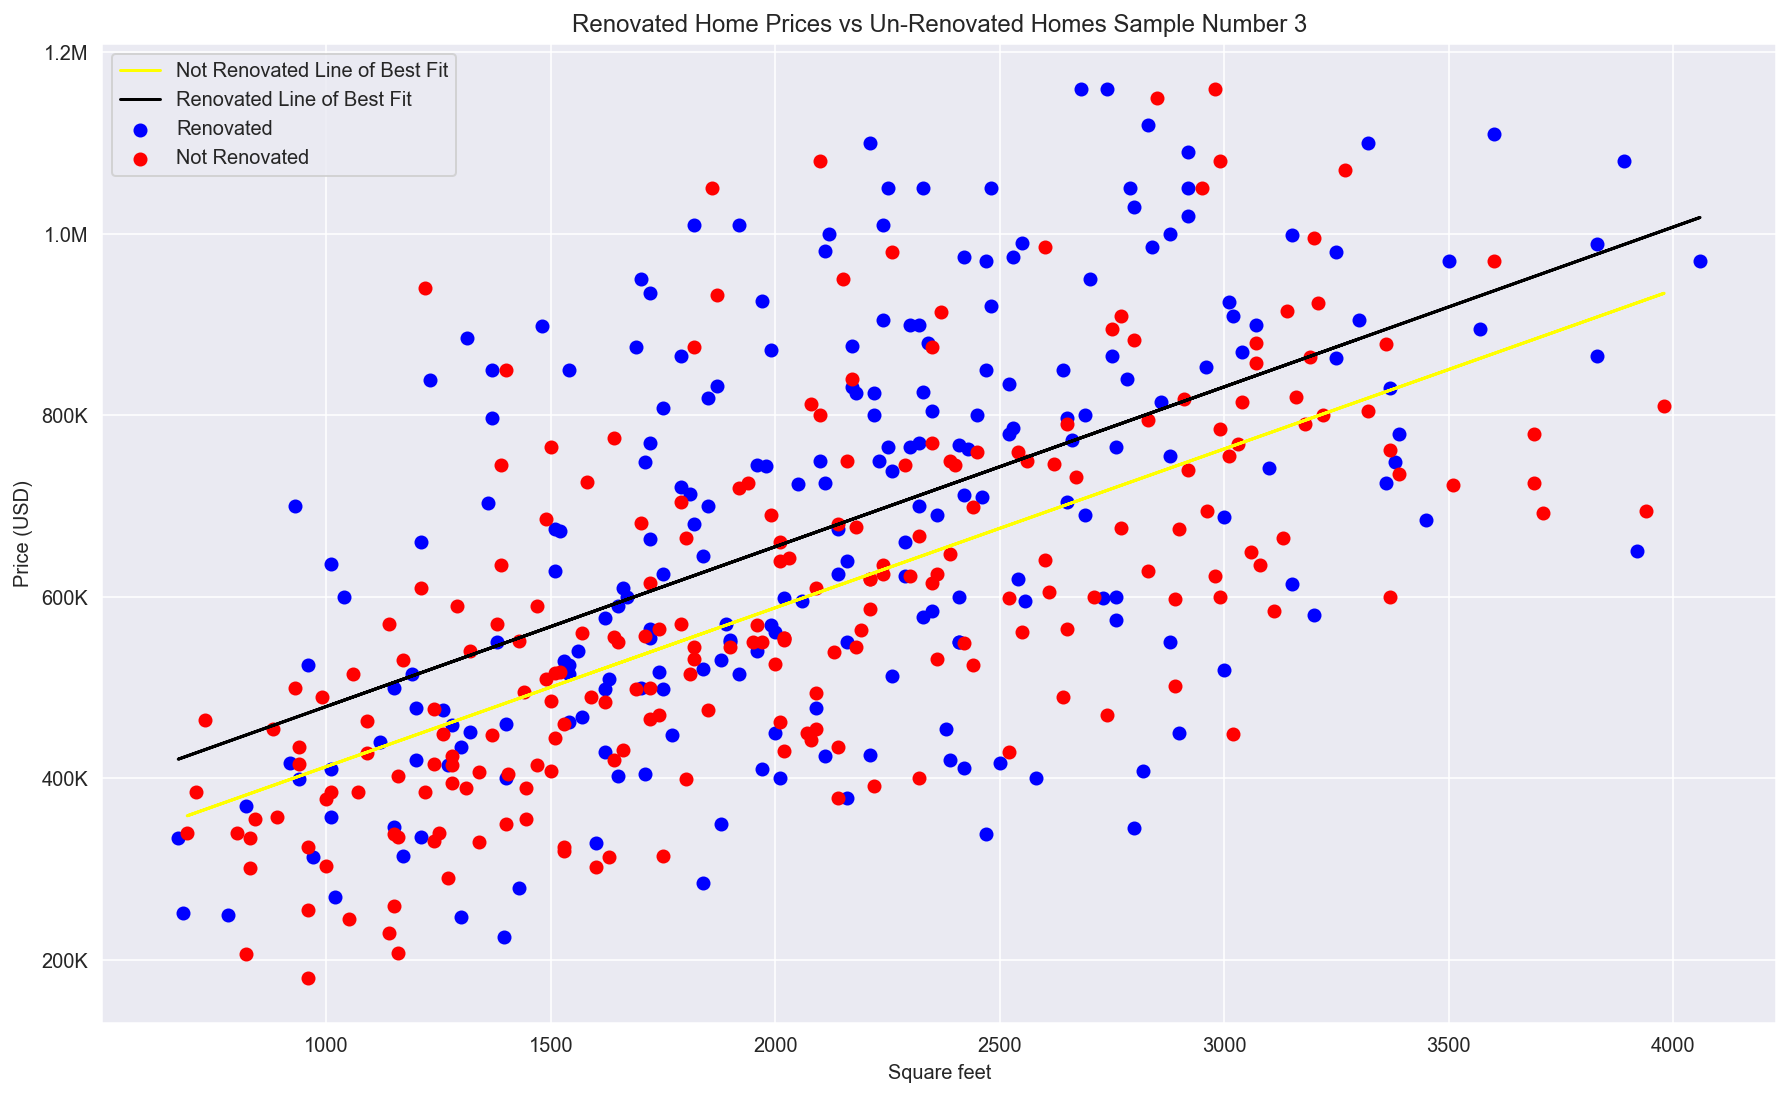

<Figure size 720x720 with 0 Axes>

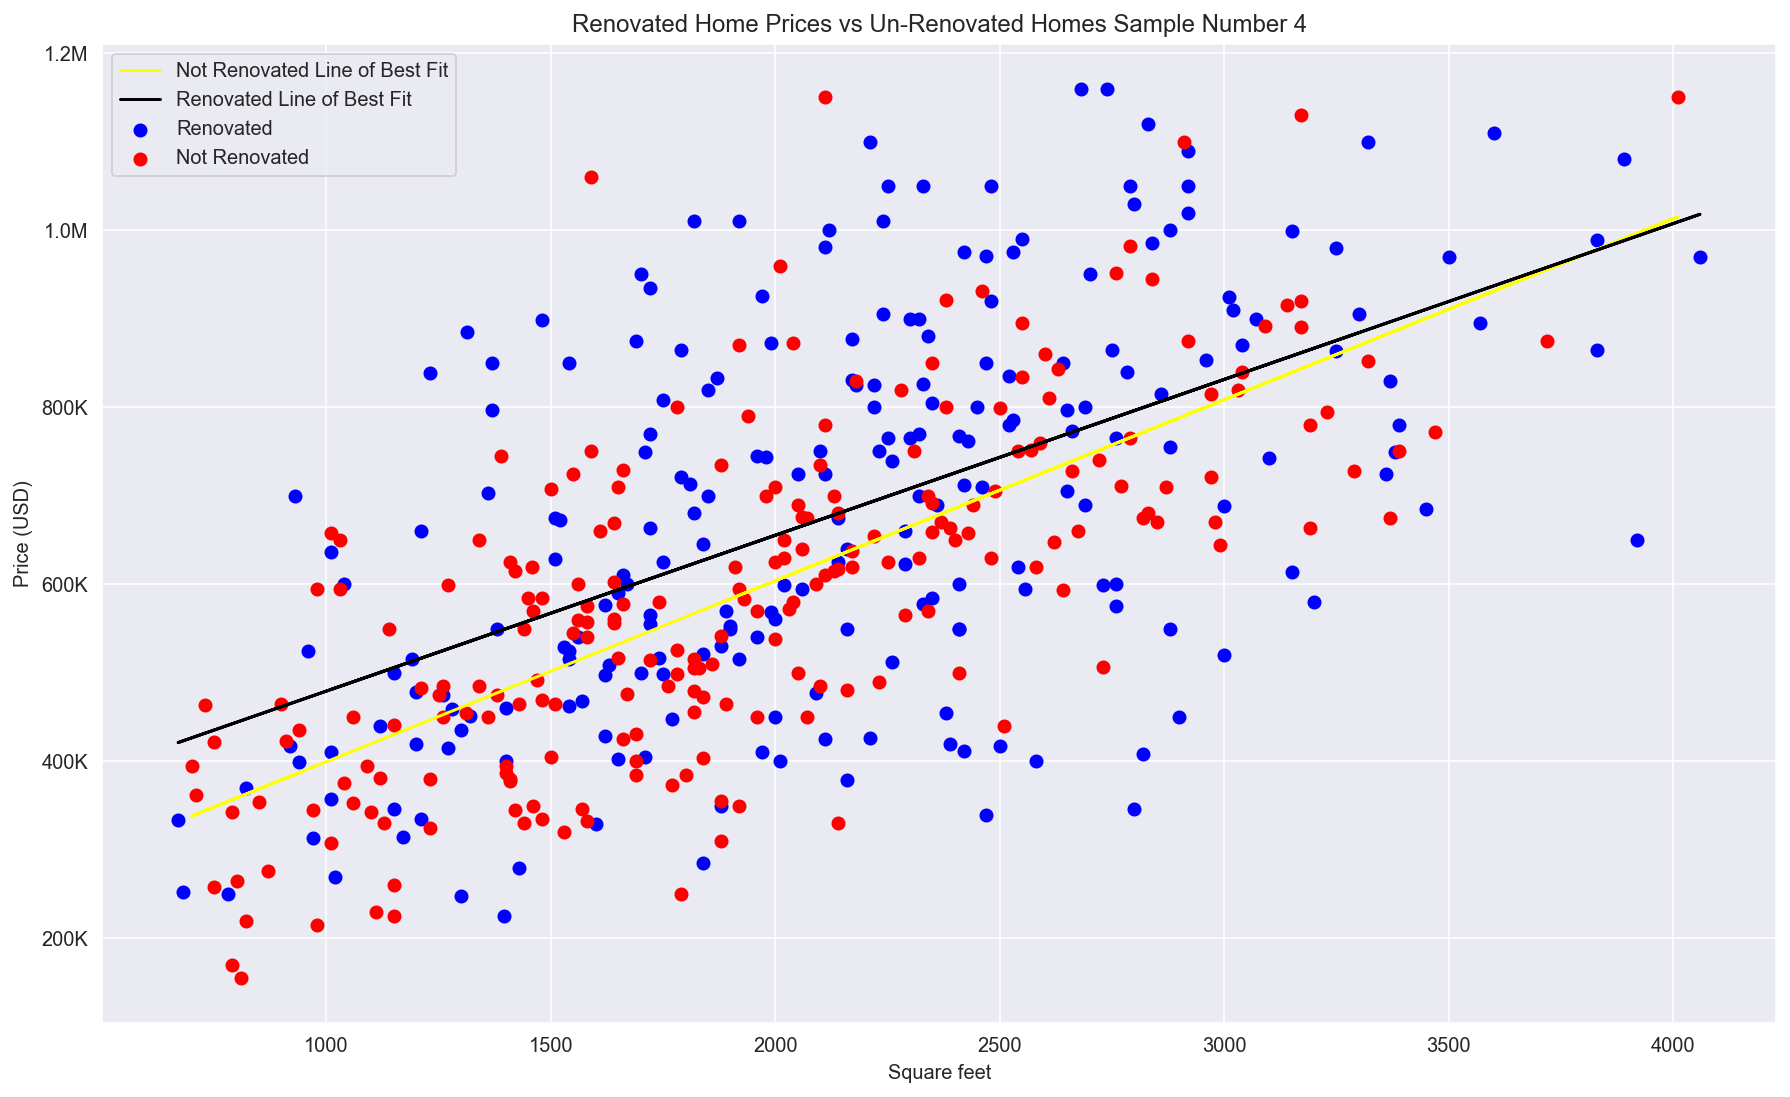

<Figure size 720x720 with 0 Axes>

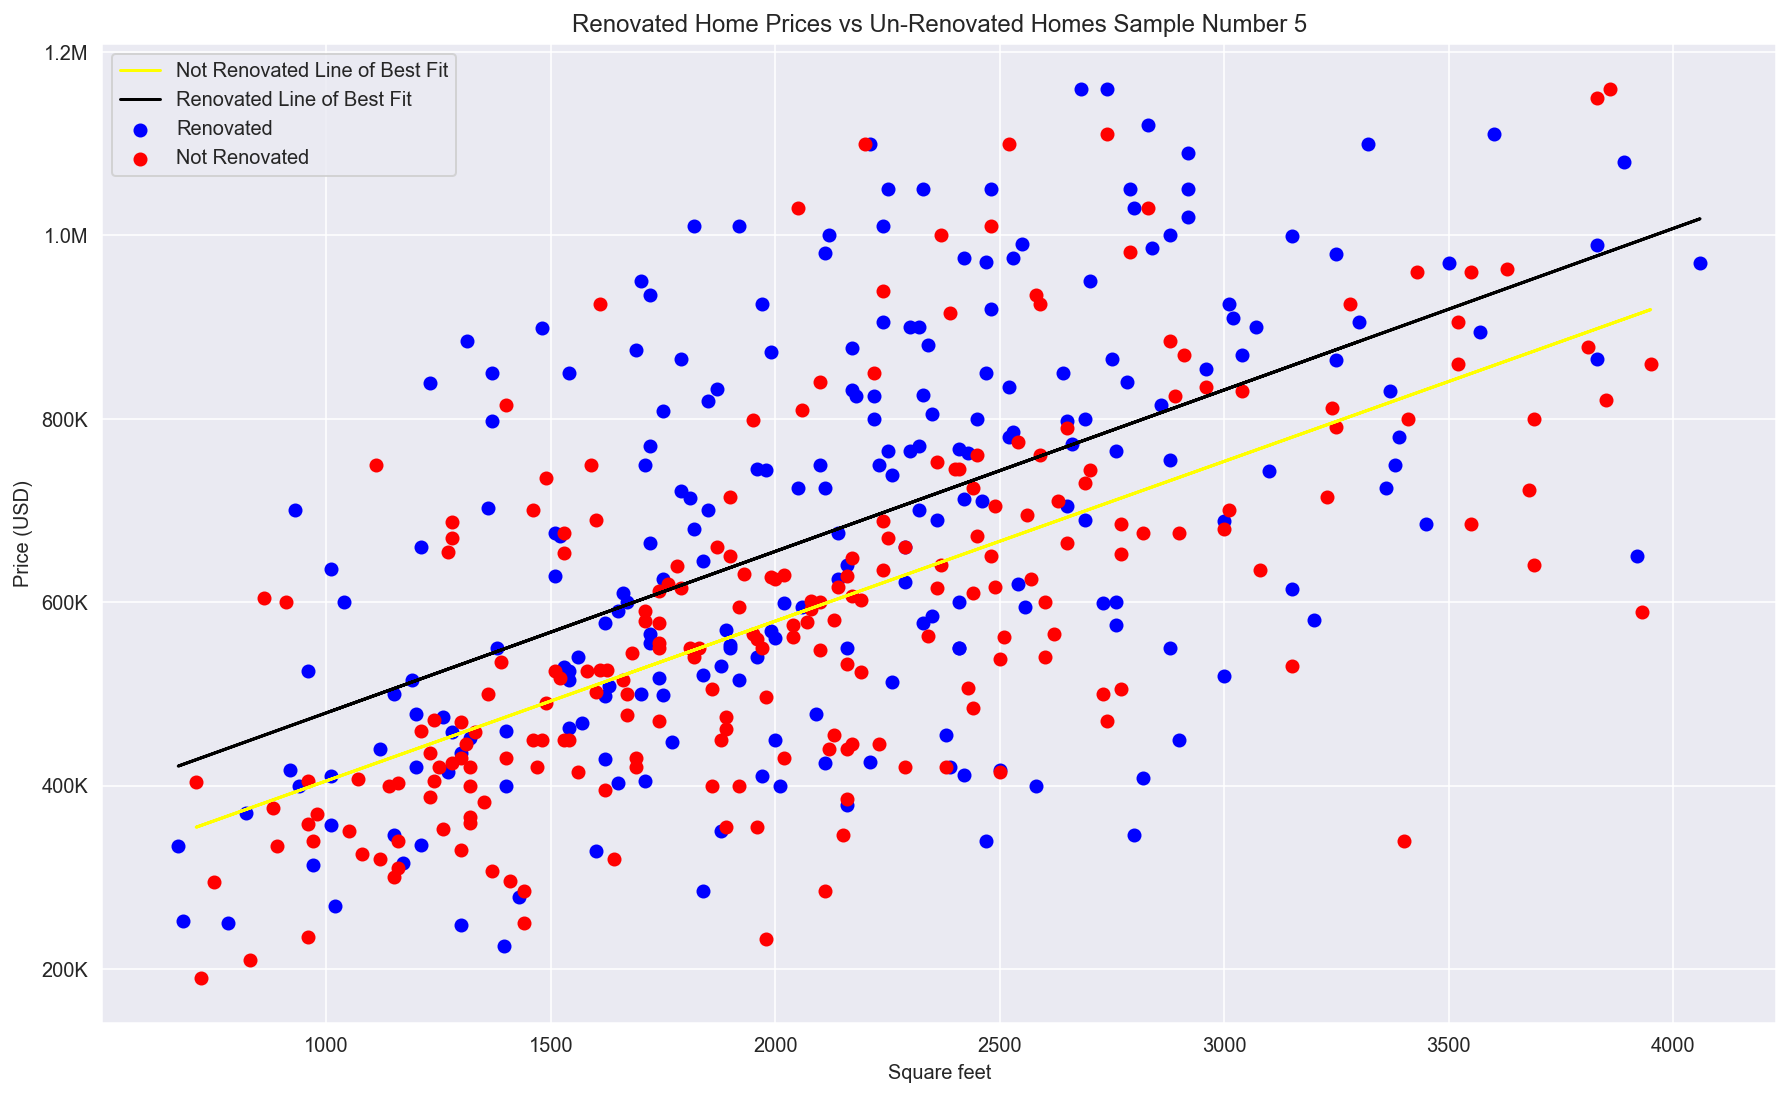

<Figure size 720x720 with 0 Axes>

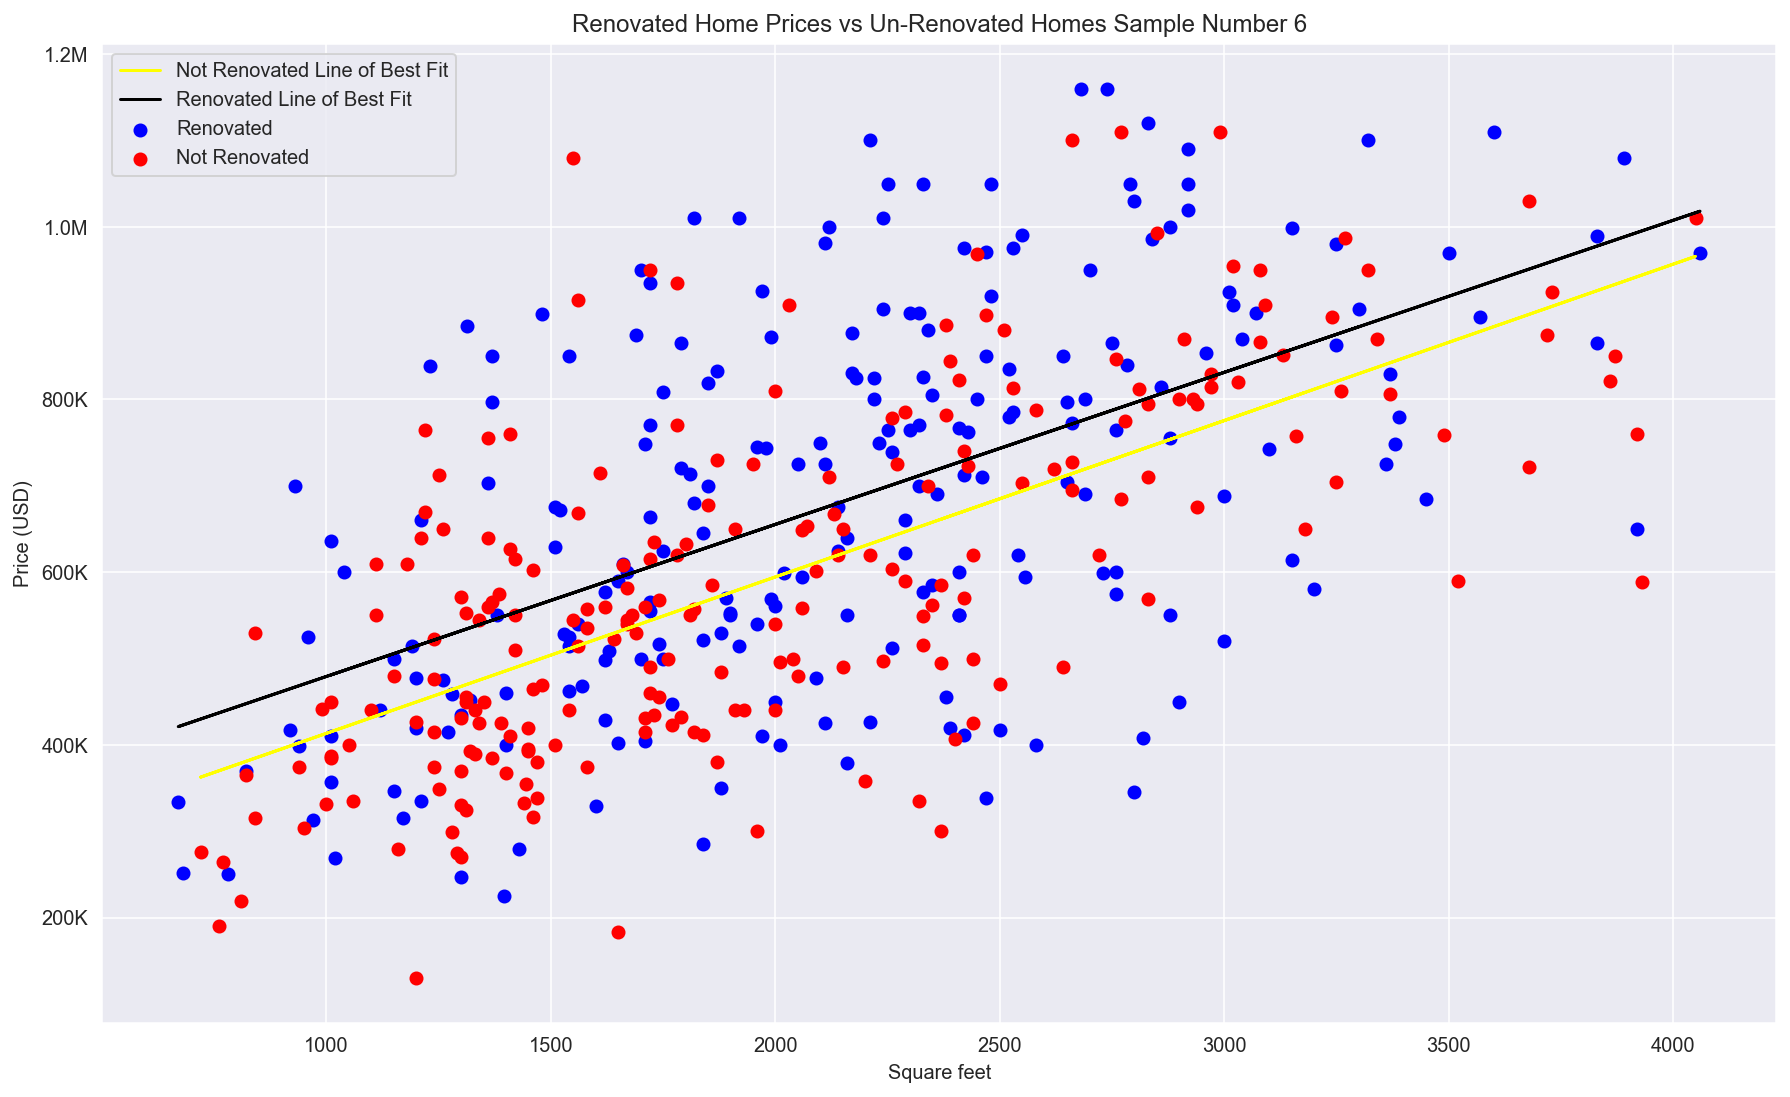

<Figure size 720x720 with 0 Axes>

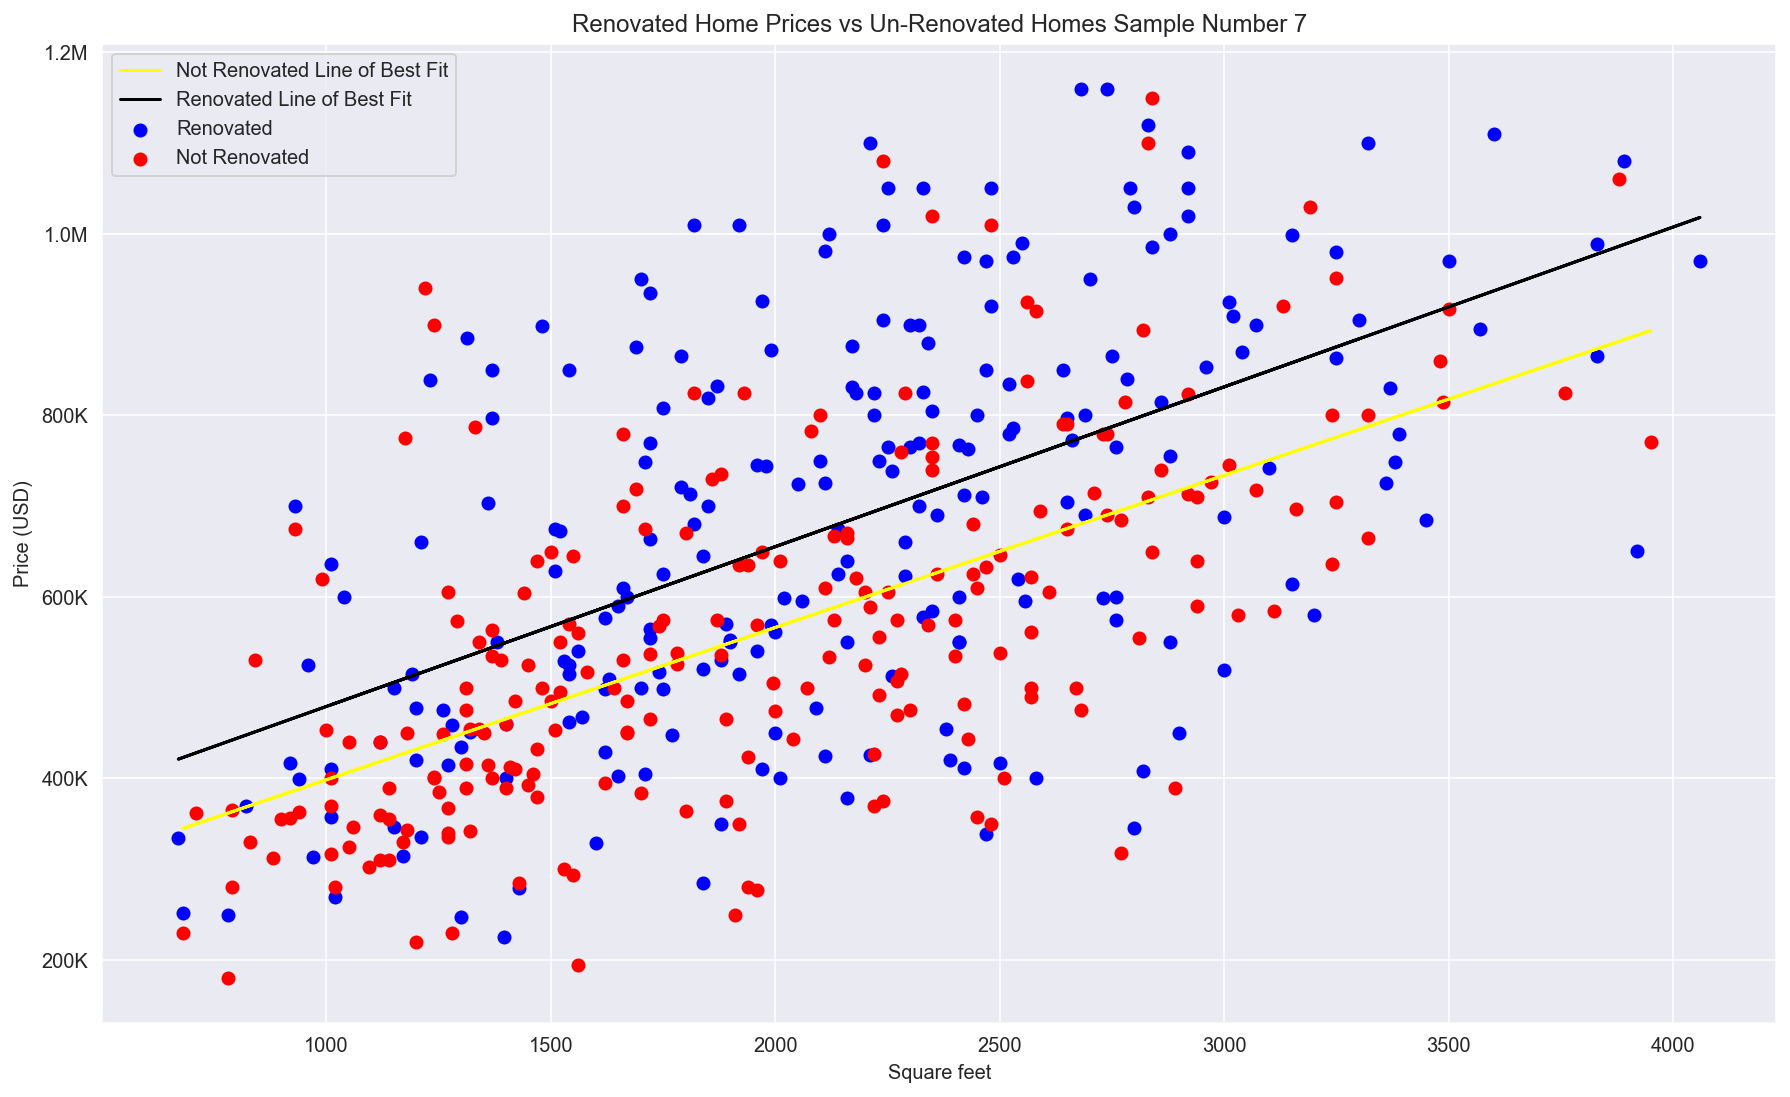

<Figure size 720x720 with 0 Axes>

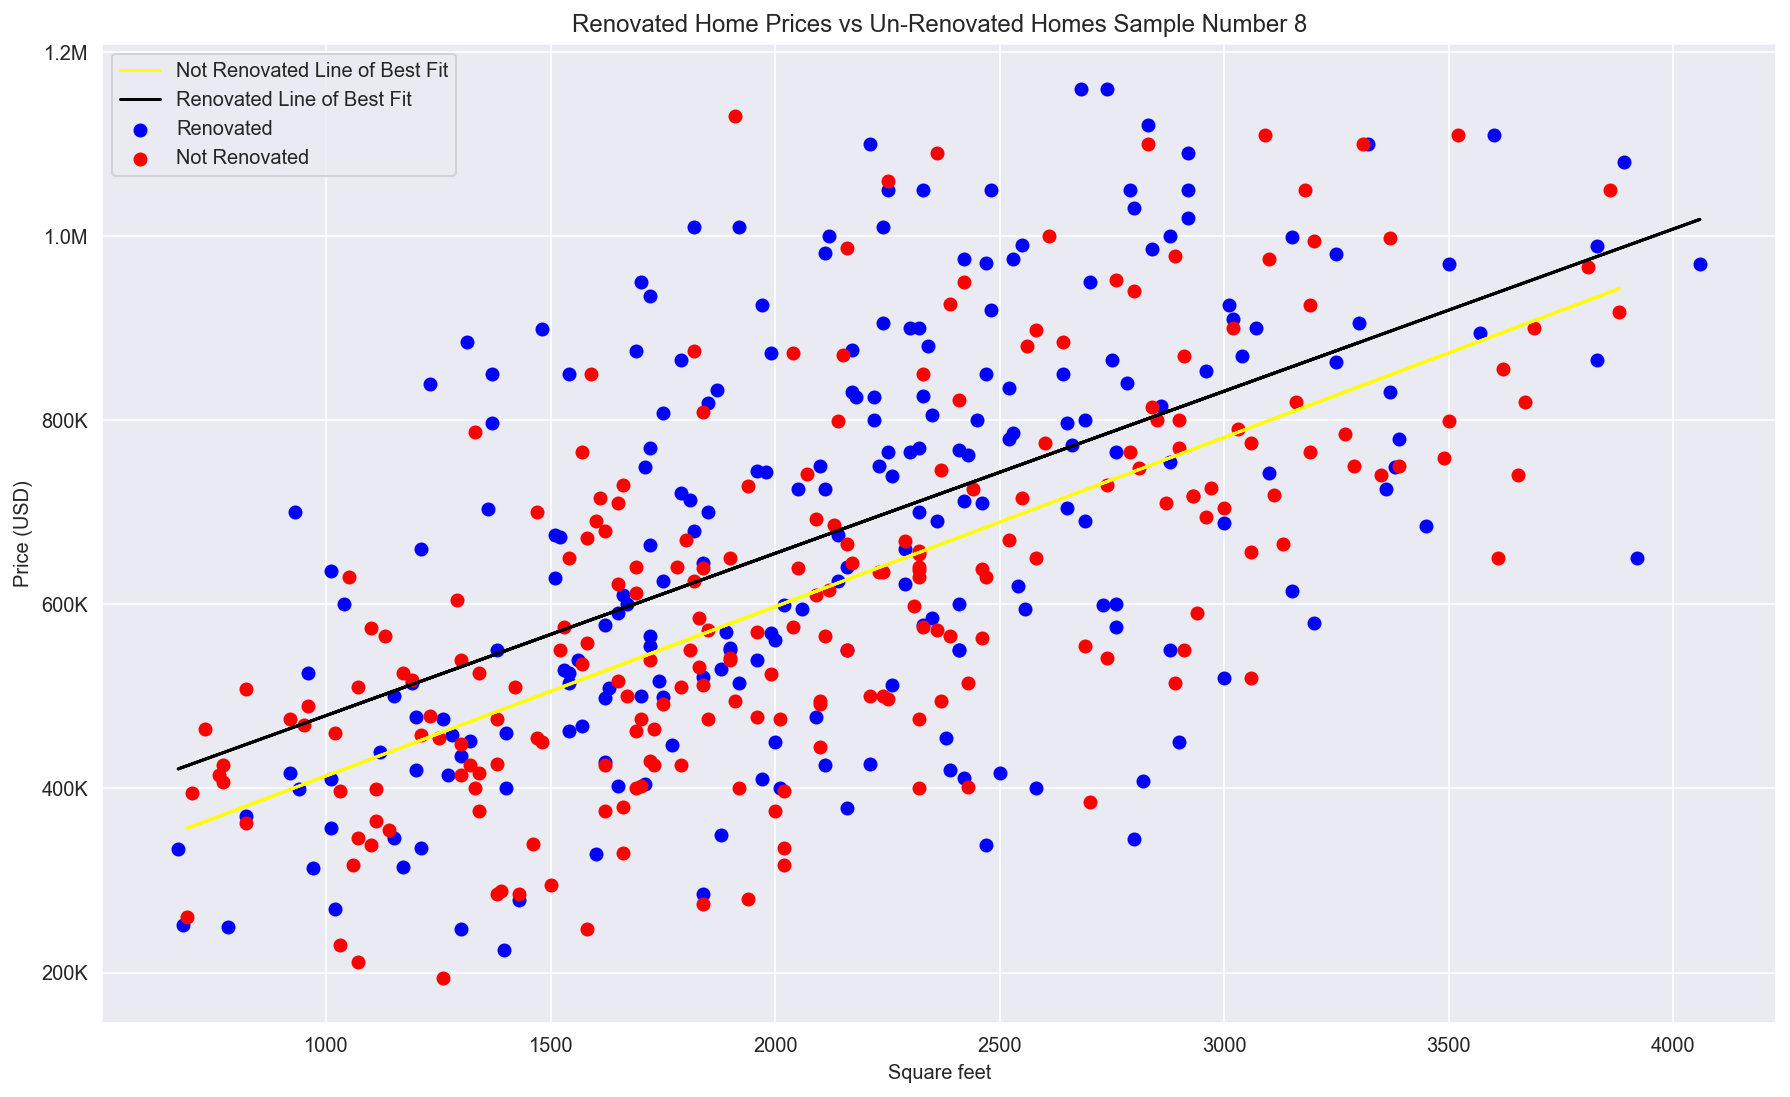

<Figure size 720x720 with 0 Axes>

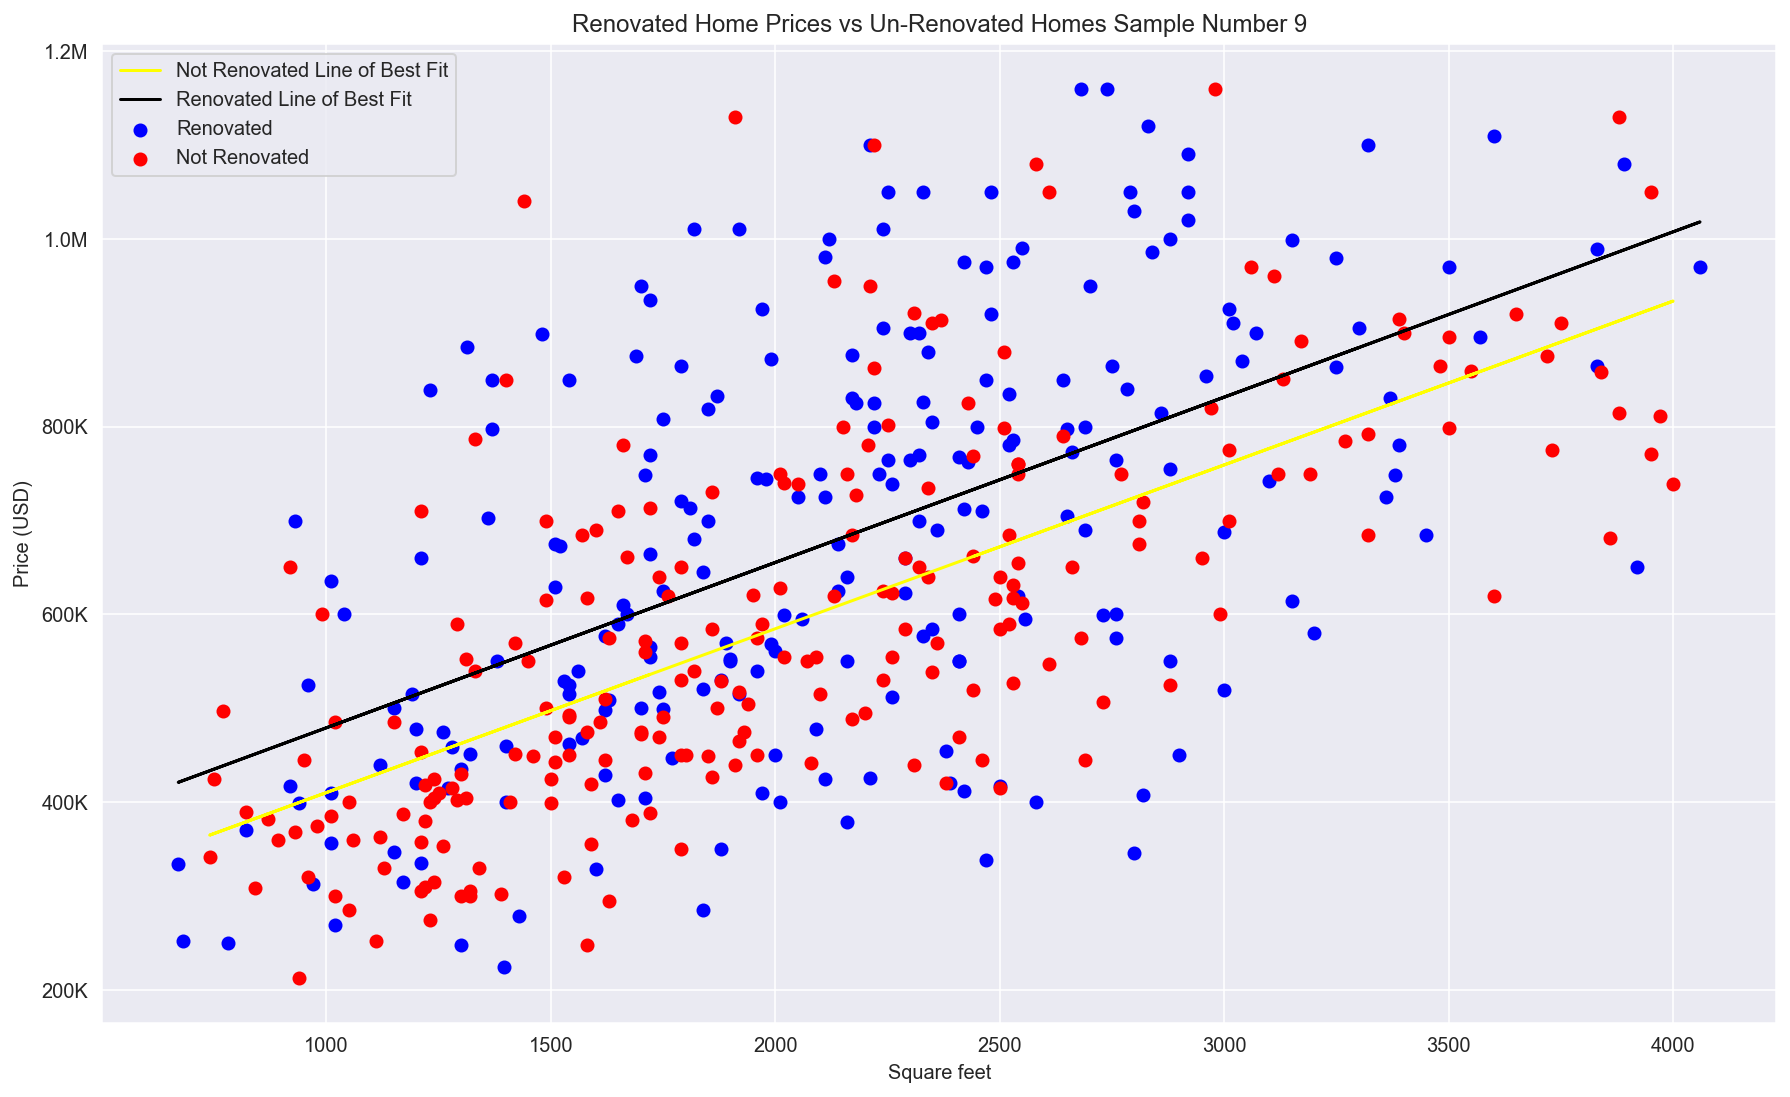

<Figure size 720x720 with 0 Axes>

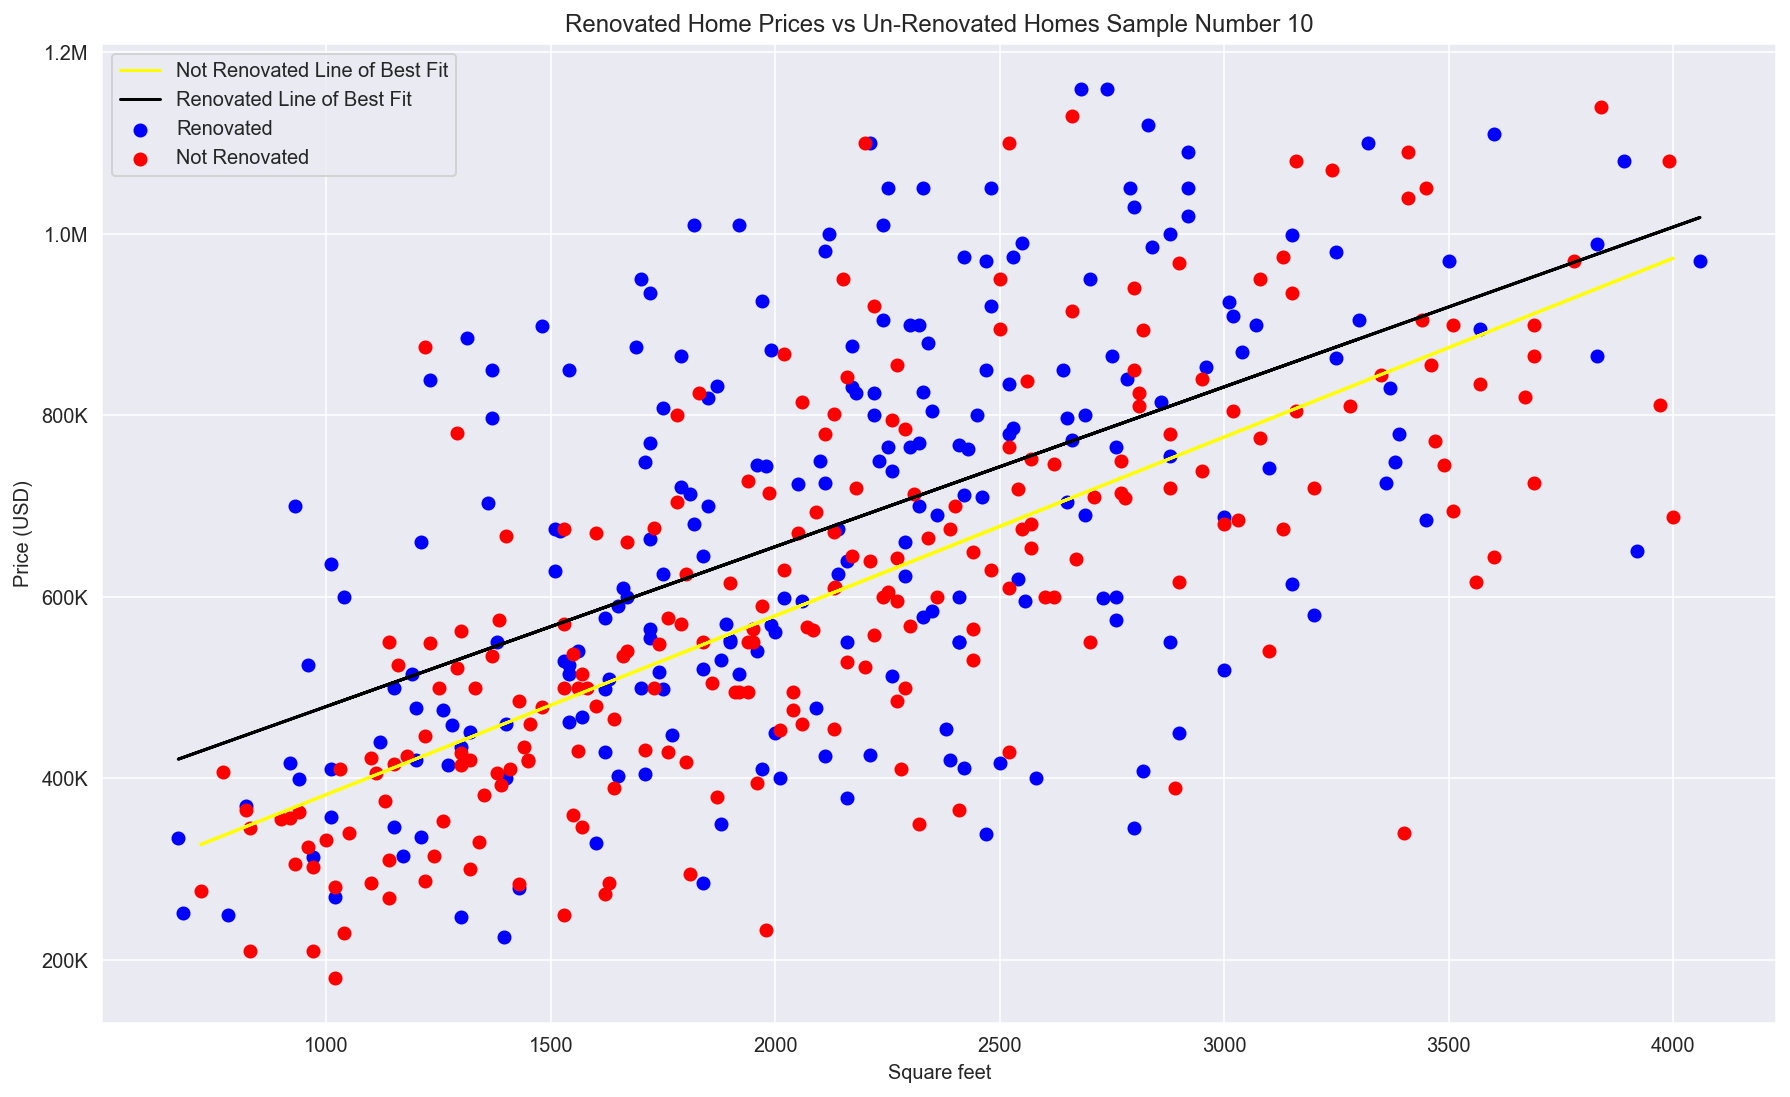

In [752]:
#Converting data to an np.array
renovated_price = np.array(renovated_homes.price)
renovated_sqft = np.array(renovated_homes.sqft_living)
#Line of best fit for renovated homes in zone 4
m, b = np.polyfit(renovated_sqft,renovated_price,1)

#Runs 10 samples over the unrenovated homes collecting 227 random samples each time.
#Maps the line of best fit of unrenovated homes sample compared #to line of 
#best fit for renovated homes in zone 4.

for i in range(0,10):
    plt.figure(figsize=(10,10))
    fig , ax = plt.subplots()
    plt.title("Renovated Home Prices vs Un-Renovated Homes Sample Number "+str(i+1))
    #Get sample
    results = rennovation_sampler()
    #Assign x to sqft of sample, y to price of sample
    x = np.array(results[0])
    y = np.array(results[1])
    #Line of best fit for sample
    m_n, b_n = np.polyfit(x.flatten(), y.flatten(), 1)
    #Plot data points with a line of best fit.
    plt.scatter(renovated_sqft, renovated_price, color='blue', label='Renovated')
    plt.scatter(x, y, color='red', label='Not Renovated')
    plt.xlabel("Square feet")
    plt.ylabel("Price (USD)")
    plt.plot(x.flatten(), m_n*x.flatten()+b_n, color='yellow',label='Not Renovated Line of Best Fit') 
    plt.plot(renovated_sqft, m*renovated_sqft+b, color='black',
             label='Renovated Line of Best Fit') 
    ax.yaxis.set_major_formatter(format_num)
    plt.legend()
    plt.show()

### Stakeholder Translation

In [753]:
#Mean confidence interval for unrenovated homes in zone 4
not_renovated_mci = mean_confidence_interval(unrenovated_homes.price)
not_renovated_mci

(590882.7945784193, 585559.342948029, 596206.2462088095)

In [754]:
#Mean confidence interval for renovated homes in zone 4
renovated_mci = mean_confidence_interval(renovated_homes.price)
renovated_mci

(681295.5022026432, 652216.0907539569, 710374.9136513295)

In [755]:
print("Adding a rennovation to your home in Zone 4 will increase the price on average $"+\
     str(round(renovated_mci[1]-not_renovated_mci[1]))+" to $"+\
     str(round(renovated_mci[2]-not_renovated_mci[2])))

Adding a rennovation to your home in Zone 4 will increase the price on average $66657.0 to $114169.0


### Additional Visualization
The analysis above was only for zone four comparison. I will now add the same comparison for the following zones.
1. Zoen two
2. Zone three
3. Zone four
4. Zone five

In [756]:
#Renovated home prices in zone 2
zone_two_ren = mean_confidence_interval(og_df.
                                        loc[(og_df['lat_long_zone'] =='Zone 2') 
                                        & (og_df.is_renovated == 1)].price)
#Unrenovated home prices in zone 2
zone_two_nren = mean_confidence_interval(og_df.
                                        loc[(og_df['lat_long_zone']=='Zone 2')
                                        & (og_df.is_renovated == 0)].price)
#Renovated home prices in zone 3
zone_three_ren = mean_confidence_interval(og_df.
                                        loc[(og_df['lat_long_zone']=='Zone 3') 
                                        & (og_df.is_renovated == 1)].price)
#Unrenovated home prices in zone 3
zone_three_nren = mean_confidence_interval(og_df.
                                        loc[(og_df['lat_long_zone']=='Zone 3') 
                                        & (og_df.is_renovated == 0)].price)
#Renovated home prices in zone 4
zone_four_ren = mean_confidence_interval(og_df.
                                        loc[(og_df['lat_long_zone']=='Zone 4') 
                                        & (og_df.is_renovated == 1)].price)
#Unrenovated home prices in zone 4                                           
zone_four_nren = mean_confidence_interval(og_df.
                                        loc[(og_df['lat_long_zone']=='Zone 4') 
                                        & (og_df.is_renovated == 0)].price)
#Renovated home prices in zone 5
zone_five_ren = mean_confidence_interval(og_df.
                                        loc[(og_df['lat_long_zone']=='Zone 5') 
                                       & (og_df.is_renovated == 1)].price)
#Unrenovated home prices in zone 5 
zone_five_nren = mean_confidence_interval(og_df.
                                        loc[(og_df['lat_long_zone']=='Zone 5')
                                        & (og_df.is_renovated == 0)].price)

#Dict showing mean prices of renovated homes - mean prices of unrenovated homes
renovated_homes = {
    'Zone Two': zone_two_ren[0]- zone_two_nren[0],
    'Zone Three' :  zone_three_ren[0] - zone_three_nren[0],
    'Zone Four' : zone_four_ren[0] - zone_four_nren[0],
    'Zone Five' : zone_four_ren[0] - zone_four_nren[0],
}

Text(0.5, 0, 'Zones')

<Figure size 720x720 with 0 Axes>

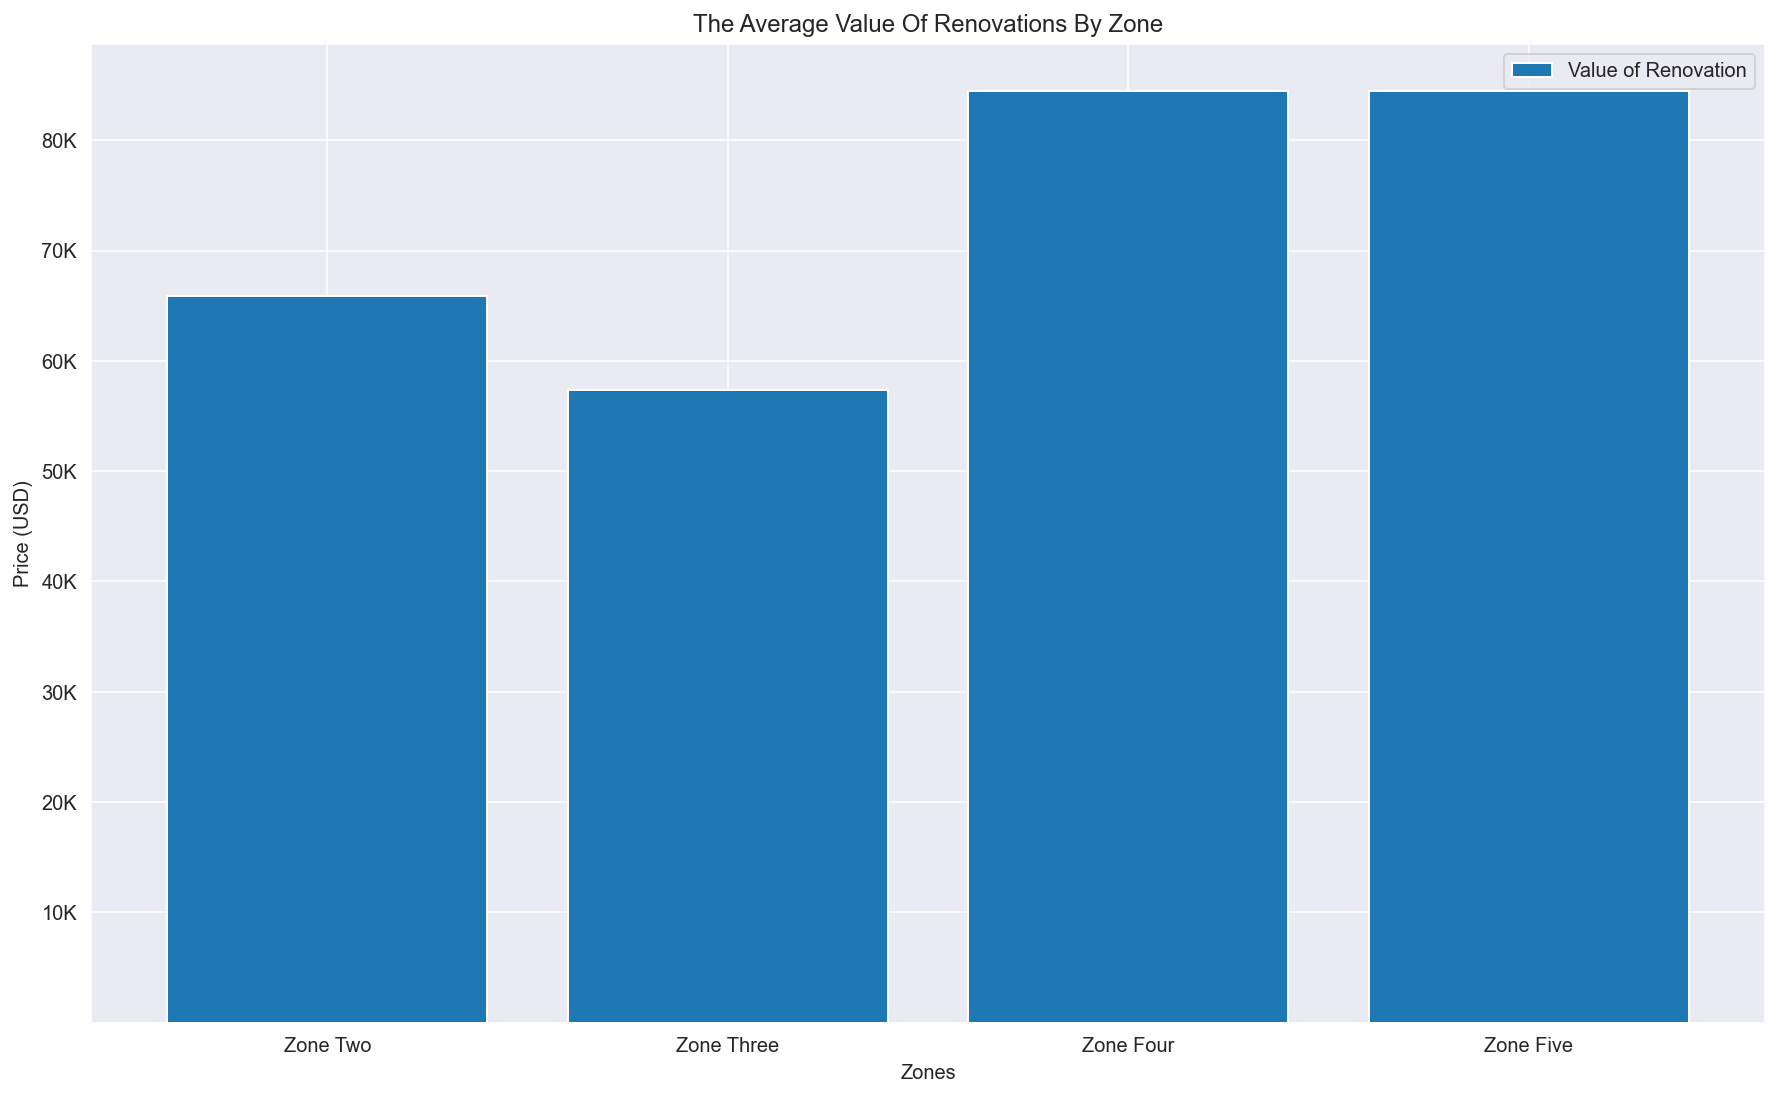

In [757]:
ax = plt.figure(figsize=(10, 10))
X = renovated_homes.keys()
y = renovated_homes.values()


fig, ax = plt.subplots()
ax.bar(X, y, label="Value of Renovation")
ax.yaxis.set_major_formatter(format_num)
ax.legend()
plt.title("The Average Value Of Renovations By Zone")
plt.ylabel("Price (USD)")
plt.xlabel("Zones")

### Additional Stakeholder Translation

In [758]:
print("Adding a renovation to your home in Zone 2 will increase the price on average $" + \
     str(round(zone_two_ren[1]-zone_two_nren[1]))+" to $"+\
     str(round(zone_two_ren[2]-zone_two_nren[2])))


print("Adding a renovation to your home in Zone 3 will increase the price on average $"+\
     str(round(zone_three_ren[1]-zone_three_nren[1]))+" to $"+\
     str(round(zone_three_ren[2]-zone_three_nren[2])))

print("Adding a renovation to your home in Zone 4 will increase the price on average $"+\
     str(round(zone_four_ren[1]-zone_four_nren[1]))+" to $"+\
     str(round(zone_four_ren[2]-zone_four_nren[2])))

print("Adding a renovation to your home in Zone 5 will increase the price on average $"+\
     str(round(zone_five_ren[1]-zone_five_nren[1]))+" to $"+\
     str(round(zone_five_ren[2]-zone_five_nren[2])))

Adding a renovation to your home in Zone 2 will increase the price on average $26086.0 to $105645.0
Adding a renovation to your home in Zone 3 will increase the price on average $23914.0 to $90769.0
Adding a renovation to your home in Zone 4 will increase the price on average $60838.0 to $108156.0
Adding a renovation to your home in Zone 5 will increase the price on average $68860.0 to $119518.0


## sqft_living

I will not investigate how sqft_living affect price per zone.

### Visualization

<Figure size 720x720 with 0 Axes>

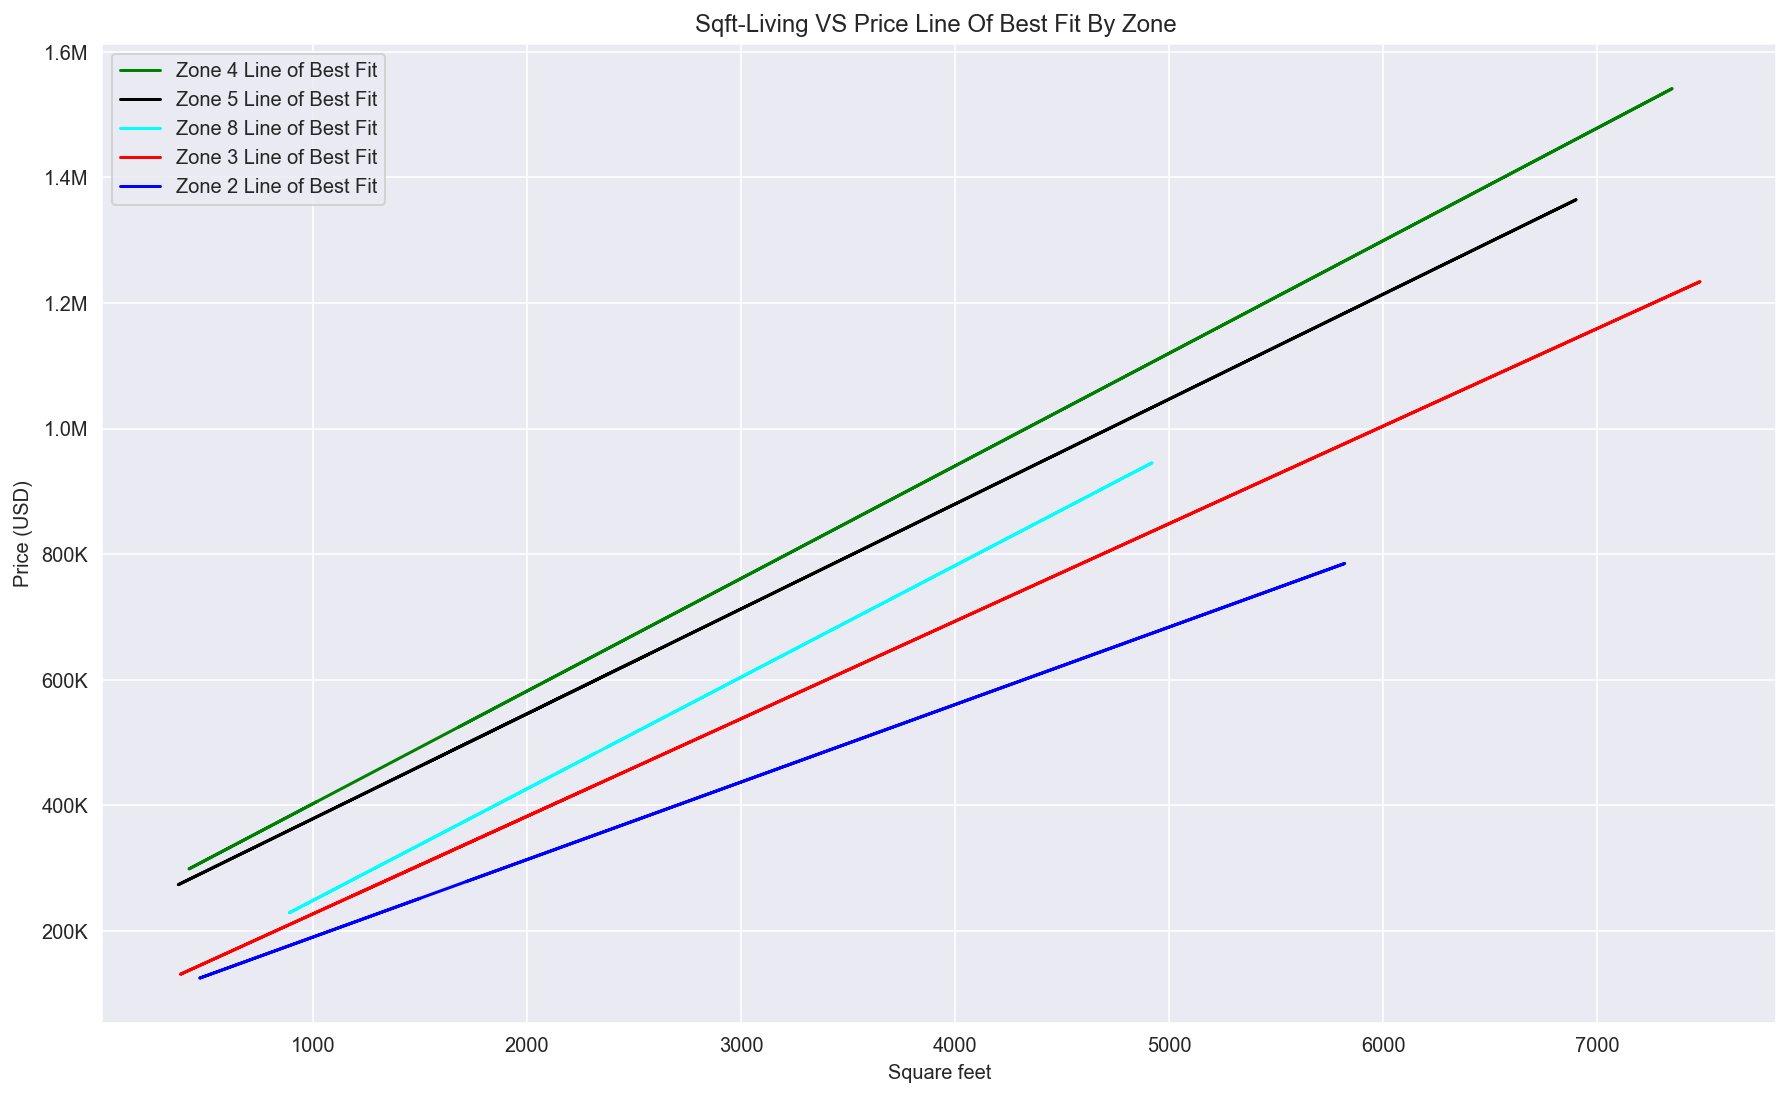

In [761]:
# Zone 5 price and square feet
zone_five_sf = og_df.loc[og_df['lat_long_zone']=='Zone 5'].sqft_living
zone_five_pr = og_df.loc[og_df['lat_long_zone']=='Zone 5'].price
# Zone 4 price and square feet
zone_four_sf = og_df.loc[og_df['lat_long_zone']=='Zone 4'].sqft_living
zone_four_pr = og_df.loc[og_df['lat_long_zone']=='Zone 4'].price
# Zone 3 price and square feet
zone_three_sf = og_df.loc[og_df['lat_long_zone']=='Zone 3'].sqft_living
zone_three_pr = og_df.loc[og_df['lat_long_zone']=='Zone 3'].price
# Zone 2 price and square feet
zone_two_sf = og_df.loc[og_df['lat_long_zone']=='Zone 2'].sqft_living
zone_two_pr = og_df.loc[og_df['lat_long_zone']=='Zone 2'].price
# Zone 8 price and square feet
zone_eight_sf = og_df.loc[og_df['lat_long_zone']=='Zone 8'].sqft_living
zone_eight_pr = og_df.loc[og_df['lat_long_zone']=='Zone 8'].price

#Lines of best fit depicting the relationship between sqft and price per zone
m_five, b_five = np.polyfit(zone_five_sf, zone_five_pr,1)
m_four, b_four = np.polyfit(zone_four_sf, zone_four_pr,1)
m_three, b_three = np.polyfit(zone_three_sf, zone_three_pr,1)
m_two, b_two = np.polyfit(zone_two_sf, zone_two_pr,1)
m_eight, b_eight = np.polyfit(zone_eight_sf, zone_eight_pr,1)





plt.figure(figsize=(10,10))
fig , ax = plt.subplots()
plt.title("Sqft-Living VS Price Line Of Best Fit By Zone ")
plt.xlabel("Square feet")
plt.ylabel("Price (USD)")
# #zone four
plt.plot(zone_four_sf, m_four*zone_four_sf + b_four, color='green',label='Zone 4 Line of Best Fit') 
#zone five
plt.plot(zone_five_sf, m_five*zone_five_sf + b_five, color='black',label='Zone 5 Line of Best Fit') 
# #zone eight
plt.plot(zone_eight_sf, m_eight*zone_eight_sf+b_eight, color='cyan',label='Zone 8 Line of Best Fit')
#zone three
plt.plot(zone_three_sf, m_three*zone_three_sf + b_three, color='red',label='Zone 3 Line of Best Fit') 
# #zone two
plt.plot(zone_two_sf, m_two * zone_two_sf + b_two, color='blue',label='Zone 2 Line of Best Fit')


ax.yaxis.set_major_formatter(format_num)
plt.legend()
plt.show()

### Business Translation

In [762]:
print("Per unit increase in sqft_living, houses in zone two will increase $"+str(m_two))
print()
print("Per unit increase in sqft_living, houses in zone three will increase $"+str(m_three))
print()
print("Per unit increase in sqft_living, houses in zone four will increase $"+str(m_four))
print()
print("Per unit increase in sqft_living, houses in zone five will increase $"+str(m_five))
print()
print("Per unit increase in sqft_living, houses in zone eight will increase $"+str(m_eight))
print()

Per unit increase in sqft_living, houses in zone two will increase $123.40730387872249

Per unit increase in sqft_living, houses in zone three will increase $155.3252222568832

Per unit increase in sqft_living, houses in zone four will increase $179.28327428984497

Per unit increase in sqft_living, houses in zone five will increase $167.0031020027334

Per unit increase in sqft_living, houses in zone eight will increase $177.73188376996546



# Conclusions

The data based on Zones will be crucial for engineers designing this grandiose project. The price ranges that reflect home features by Zone will give users a deeper understanding of the real estate markets in King County Washington. With a clean UI, Google can now provide enterprise level analysis of the national real estate market bases on coordinate zones. In doing so, they can empower smaller entities with an in depth understanding of real estate markets. 